In [4]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 97)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
number_codes = []
for i in range(2**5, 2**6-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**5 - 1,6).T.tolist() 

In [7]:
classes = []
for i in range(2**5 - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []
#classes = [[0],[0,5],[0,4],[0,4,5],[0,3],[0,3,5],[0,3,4],[0,3,4,5],[0,2],[0,2,5],[0,2,4],[0,2,4,5],[0,2,3],[0,2,3,5],[0,2,3,4],[0,2,3,4,5],[0,1],[0,1,5],[0,1,4],[0,1,4,5],[0,1,3],[0,1,3,5],[0,1,3,4],[0,1,3,4,5],[0,1,2],[0,1,2,5],[0,1,2,4],[0,1,2,4,5],[0,1,2,3],[0,1,2,3,5],[0,1,2,3,4]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.65140 stdev: 0.20236
Best fitness: 0.91094 - size: (2, 7) - species 2 - id 73
Average adjusted fitness: 0.458
Mean genetic distance 2.809, standard deviation 0.536
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 15.079 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64706 stdev: 0.20785
Best fitness: 0.91094 - size: (2, 7) - species 2 - id 73
Average adjusted fitness: 0.455
Mean genetic distance 2.805, standard deviation 0.509
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 17.586 sec (16.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63375 stdev: 0.21162
Best fitness: 0.91094 - size: (2, 7) - species 2 - id 73
Average adjusted fitness: 0.436
Mean genetic distance 2.827, standard deviation 0.534
Population of 201 members in 20 species
Total extinction

Total extinctions: 0
Generation time: 21.640 sec (20.798 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64279 stdev: 0.22898
Best fitness: 0.95107 - size: (3, 11) - species 7 - id 3976
Average adjusted fitness: 0.408
Mean genetic distance 3.150, standard deviation 0.549
Population of 207 members in 27 species
Total extinctions: 0
Generation time: 20.916 sec (21.062 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65567 stdev: 0.22502
Best fitness: 0.95107 - size: (3, 11) - species 7 - id 3976
Average adjusted fitness: 0.475
Mean genetic distance 3.167, standard deviation 0.546
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.822 sec (21.371 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66967 stdev: 0.21776
Best fitness: 0.95107 - size: (3, 11) - species 7 - id 3976
Average adjusted fitness: 0.412
Mean genetic distance 3.132, standard deviation 0.553
Popul


 ****** Running generation 48 ****** 

Population's average fitness: 0.66437 stdev: 0.21945
Best fitness: 0.96212 - size: (7, 15) - species 37 - id 6992
Average adjusted fitness: 0.420
Mean genetic distance 3.049, standard deviation 0.564
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 20.833 sec (21.167 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65206 stdev: 0.23817
Best fitness: 0.96212 - size: (7, 15) - species 37 - id 6992
Average adjusted fitness: 0.433
Mean genetic distance 3.063, standard deviation 0.570
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 20.844 sec (21.143 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65335 stdev: 0.23184
Best fitness: 0.96212 - size: (7, 15) - species 37 - id 6992
Average adjusted fitness: 0.533
Mean genetic distance 3.048, standard deviation 0.562
Population of 200 members in 17 species
Total extinctions: 0
Generat

Population's average fitness: 0.68023 stdev: 0.20000
Best fitness: 0.96325 - size: (8, 17) - species 37 - id 8911
Average adjusted fitness: 0.417
Mean genetic distance 2.970, standard deviation 0.601
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 20.817 sec (20.986 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65338 stdev: 0.22701
Best fitness: 0.96325 - size: (8, 17) - species 37 - id 8911
Average adjusted fitness: 0.430
Mean genetic distance 2.989, standard deviation 0.593
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 20.086 sec (20.911 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67490 stdev: 0.20492
Best fitness: 0.96325 - size: (8, 17) - species 37 - id 8911
Average adjusted fitness: 0.407
Mean genetic distance 3.020, standard deviation 0.613
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 21.080 sec (20.927 average)

 

Population's average fitness: 0.67332 stdev: 0.21339
Best fitness: 0.96325 - size: (8, 17) - species 37 - id 8911
Average adjusted fitness: 0.427
Mean genetic distance 3.228, standard deviation 0.598
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 24.384 sec (22.903 average)
number of class1:2110
number of class2:2325

 ****** Running generation 0 ****** 

Population's average fitness: 0.51175 stdev: 0.03066
Best fitness: 0.63563 - size: (2, 7) - species 3 - id 191
Average adjusted fitness: 0.108
Mean genetic distance 2.747, standard deviation 0.458
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 15.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51771 stdev: 0.03572
Best fitness: 0.63563 - size: (2, 7) - species 3 - id 191
Average adjusted fitness: 0.176
Mean genetic distance 2.842, standard deviation 0.475
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 16.529 sec 

Population's average fitness: 0.54805 stdev: 0.06600
Best fitness: 0.72176 - size: (5, 12) - species 5 - id 3726
Average adjusted fitness: 0.130
Mean genetic distance 3.064, standard deviation 0.562
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 20.939 sec (21.261 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.54648 stdev: 0.06422
Best fitness: 0.72176 - size: (5, 12) - species 5 - id 3726
Average adjusted fitness: 0.158
Mean genetic distance 3.058, standard deviation 0.558
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.343 sec (21.481 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.54743 stdev: 0.06351
Best fitness: 0.72176 - size: (5, 12) - species 5 - id 3726
Average adjusted fitness: 0.135
Mean genetic distance 3.069, standard deviation 0.550
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.042 sec (21.653 average)

 ***

Population's average fitness: 0.54588 stdev: 0.07206
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.175
Mean genetic distance 3.184, standard deviation 0.590
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 24.566 sec (24.540 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.55276 stdev: 0.06912
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.120
Mean genetic distance 3.139, standard deviation 0.559
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 24.213 sec (24.408 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.55292 stdev: 0.07426
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.180
Mean genetic distance 3.172, standard deviation 0.552
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 25.683 sec (24.446 average)

 ***

Population's average fitness: 0.54996 stdev: 0.07304
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.130
Mean genetic distance 3.176, standard deviation 0.585
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 23.819 sec (22.578 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.55193 stdev: 0.07126
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.127
Mean genetic distance 3.183, standard deviation 0.609
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 22.886 sec (22.588 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.55525 stdev: 0.07276
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.087
Mean genetic distance 3.149, standard deviation 0.612
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 21.834 sec (22.495 average)

 ***

Population's average fitness: 0.55163 stdev: 0.07711
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.222
Mean genetic distance 3.151, standard deviation 0.535
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 24.763 sec (24.232 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.55909 stdev: 0.07540
Best fitness: 0.73506 - size: (5, 13) - species 5 - id 4689
Average adjusted fitness: 0.149
Mean genetic distance 3.161, standard deviation 0.539
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 25.017 sec (24.350 average)
number of class1:1542
number of class2:2893

 ****** Running generation 0 ****** 

Population's average fitness: 0.57319 stdev: 0.13197
Best fitness: 0.80474 - size: (2, 7) - species 1 - id 51
Average adjusted fitness: 0.368
Mean genetic distance 2.782, standard deviation 0.482
Population of 199 members in 14 species
Total extinctions: 0
Generation

Total extinctions: 0
Generation time: 19.753 sec (19.297 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58420 stdev: 0.16701
Best fitness: 0.88997 - size: (5, 14) - species 21 - id 1597
Average adjusted fitness: 0.379
Mean genetic distance 3.085, standard deviation 0.556
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 19.919 sec (19.426 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59272 stdev: 0.16162
Best fitness: 0.89154 - size: (4, 12) - species 5 - id 3597
Average adjusted fitness: 0.351
Mean genetic distance 3.082, standard deviation 0.562
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 21.204 sec (19.651 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.57526 stdev: 0.17005
Best fitness: 0.89154 - size: (4, 12) - species 5 - id 3597
Average adjusted fitness: 0.293
Mean genetic distance 3.066, standard deviation 0.552
Popu

Generation time: 21.850 sec (21.520 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.61306 stdev: 0.15267
Best fitness: 0.89154 - size: (4, 12) - species 5 - id 3597
Average adjusted fitness: 0.367
Mean genetic distance 3.271, standard deviation 0.591
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.864 sec (21.538 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.58497 stdev: 0.16100
Best fitness: 0.89290 - size: (5, 13) - species 5 - id 7499
Average adjusted fitness: 0.361
Mean genetic distance 3.273, standard deviation 0.571
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 21.018 sec (21.439 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.58556 stdev: 0.16155
Best fitness: 0.89290 - size: (5, 13) - species 5 - id 7499
Average adjusted fitness: 0.372
Mean genetic distance 3.277, standard deviation 0.569
Population of 199 members 

Population's average fitness: 0.60779 stdev: 0.16116
Best fitness: 0.89290 - size: (5, 13) - species 5 - id 7499
Average adjusted fitness: 0.376
Mean genetic distance 3.199, standard deviation 0.601
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 24.751 sec (24.237 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.60533 stdev: 0.15372
Best fitness: 0.89290 - size: (5, 13) - species 5 - id 7499
Average adjusted fitness: 0.386
Mean genetic distance 3.220, standard deviation 0.594
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 24.654 sec (24.250 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.58820 stdev: 0.16343
Best fitness: 0.89290 - size: (5, 13) - species 5 - id 7499
Average adjusted fitness: 0.350
Mean genetic distance 3.213, standard deviation 0.579
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 24.001 sec (24.251 average)

 ***

Population's average fitness: 0.59797 stdev: 0.16432
Best fitness: 0.89290 - size: (5, 13) - species 68 - id 7499
Average adjusted fitness: 0.313
Mean genetic distance 3.032, standard deviation 0.559
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 24.570 sec (25.096 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.59396 stdev: 0.17081
Best fitness: 0.89290 - size: (5, 13) - species 68 - id 7499
Average adjusted fitness: 0.370
Mean genetic distance 3.024, standard deviation 0.544
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 25.590 sec (25.045 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.61699 stdev: 0.15163
Best fitness: 0.89628 - size: (5, 12) - species 5 - id 15583
Average adjusted fitness: 0.363
Mean genetic distance 3.037, standard deviation 0.543
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 25.643 sec (25.041 average)
nu

Population's average fitness: 0.56768 stdev: 0.09798
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.216
Mean genetic distance 3.196, standard deviation 0.535
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 22.009 sec (20.699 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.57695 stdev: 0.09329
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.165
Mean genetic distance 3.222, standard deviation 0.544
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 21.362 sec (20.878 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.55869 stdev: 0.10421
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.225
Mean genetic distance 3.228, standard deviation 0.540
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 20.867 sec (20.774 average)

 

Mean genetic distance 3.143, standard deviation 0.581
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 28.079 sec (28.268 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.54707 stdev: 0.10738
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.220
Mean genetic distance 3.162, standard deviation 0.574
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 29.354 sec (28.403 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.55977 stdev: 0.10711
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.223
Mean genetic distance 3.142, standard deviation 0.577
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 28.538 sec (28.460 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.54567 stdev: 0.10462
Best fitness: 0.72311 - size: (5, 13) - species 35 - id

Mean genetic distance 3.152, standard deviation 0.521
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 26.545 sec (27.069 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.56035 stdev: 0.10774
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.206
Mean genetic distance 3.137, standard deviation 0.532
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 27.286 sec (27.207 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.55215 stdev: 0.11127
Best fitness: 0.72311 - size: (5, 13) - species 35 - id 2304
Average adjusted fitness: 0.223
Mean genetic distance 3.124, standard deviation 0.548
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 26.677 sec (27.200 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.53839 stdev: 0.11164
Best fitness: 0.72311 - size: (5, 13) - species 35 - id

Generation time: 18.198 sec (18.167 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61655 stdev: 0.13113
Best fitness: 0.83923 - size: (5, 12) - species 17 - id 2496
Average adjusted fitness: 0.289
Mean genetic distance 3.130, standard deviation 0.582
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 19.423 sec (18.351 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61452 stdev: 0.13630
Best fitness: 0.85457 - size: (4, 10) - species 32 - id 3126
Average adjusted fitness: 0.275
Mean genetic distance 3.111, standard deviation 0.590
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 18.377 sec (18.377 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58861 stdev: 0.14868
Best fitness: 0.85457 - size: (4, 10) - species 32 - id 3126
Average adjusted fitness: 0.258
Mean genetic distance 3.115, standard deviation 0.598
Population of 195 membe

Population's average fitness: 0.60567 stdev: 0.15141
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.273
Mean genetic distance 3.156, standard deviation 0.547
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 23.889 sec (22.251 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.60595 stdev: 0.15595
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.310
Mean genetic distance 3.141, standard deviation 0.535
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 23.570 sec (22.494 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.60914 stdev: 0.15101
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.271
Mean genetic distance 3.172, standard deviation 0.528
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 23.099 sec (22.654 average)

 

Population's average fitness: 0.59386 stdev: 0.16758
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.256
Mean genetic distance 3.127, standard deviation 0.527
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 24.400 sec (22.618 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.60042 stdev: 0.16805
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.343
Mean genetic distance 3.114, standard deviation 0.549
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 23.565 sec (22.724 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.59796 stdev: 0.17174
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.263
Mean genetic distance 3.102, standard deviation 0.548
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 22.969 sec (22.700 average)

 

Population's average fitness: 0.59171 stdev: 0.16811
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.255
Mean genetic distance 3.071, standard deviation 0.559
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 25.704 sec (24.121 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.59413 stdev: 0.17476
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.256
Mean genetic distance 3.089, standard deviation 0.544
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 25.977 sec (24.520 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.59934 stdev: 0.16915
Best fitness: 0.87734 - size: (6, 16) - species 45 - id 5246
Average adjusted fitness: 0.340
Mean genetic distance 3.102, standard deviation 0.535
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 25.770 sec (24.894 average)

 

Population's average fitness: 0.58245 stdev: 0.10335
Best fitness: 0.73326 - size: (3, 11) - species 4 - id 1971
Average adjusted fitness: 0.222
Mean genetic distance 3.149, standard deviation 0.490
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 19.384 sec (19.136 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57674 stdev: 0.10543
Best fitness: 0.73326 - size: (3, 11) - species 4 - id 1971
Average adjusted fitness: 0.229
Mean genetic distance 3.154, standard deviation 0.507
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 19.089 sec (19.161 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56792 stdev: 0.10683
Best fitness: 0.73326 - size: (3, 11) - species 4 - id 1971
Average adjusted fitness: 0.225
Mean genetic distance 3.158, standard deviation 0.508
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 20.379 sec (19.361 average)

 ***

Population's average fitness: 0.55487 stdev: 0.11558
Best fitness: 0.73574 - size: (6, 13) - species 45 - id 2993
Average adjusted fitness: 0.247
Mean genetic distance 3.228, standard deviation 0.574
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.498 sec (22.586 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.56558 stdev: 0.10897
Best fitness: 0.73574 - size: (6, 13) - species 45 - id 2993
Average adjusted fitness: 0.136
Mean genetic distance 3.237, standard deviation 0.579
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.176 sec (22.576 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.56675 stdev: 0.11340
Best fitness: 0.73574 - size: (6, 13) - species 45 - id 2993
Average adjusted fitness: 0.257
Mean genetic distance 3.248, standard deviation 0.578
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 22.680 sec (22.689 average)

 

Population's average fitness: 0.56810 stdev: 0.11483
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.211
Mean genetic distance 3.194, standard deviation 0.529
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.341 sec (23.431 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.56496 stdev: 0.11655
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.259
Mean genetic distance 3.167, standard deviation 0.533
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 23.504 sec (23.258 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.57571 stdev: 0.11406
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.151
Mean genetic distance 3.169, standard deviation 0.543
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 22.672 sec (23.163 average)

 ***

Population's average fitness: 0.56431 stdev: 0.11061
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.202
Mean genetic distance 3.146, standard deviation 0.548
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 24.693 sec (23.831 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.56924 stdev: 0.11405
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.144
Mean genetic distance 3.144, standard deviation 0.549
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 24.296 sec (23.986 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.55964 stdev: 0.11387
Best fitness: 0.73754 - size: (3, 10) - species 4 - id 6663
Average adjusted fitness: 0.253
Mean genetic distance 3.141, standard deviation 0.547
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 24.169 sec (24.068 average)

 ***

Population's average fitness: 0.55296 stdev: 0.08360
Best fitness: 0.77880 - size: (3, 10) - species 20 - id 991
Average adjusted fitness: 0.234
Mean genetic distance 3.052, standard deviation 0.583
Population of 209 members in 28 species
Total extinctions: 0
Generation time: 17.127 sec (17.988 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.55277 stdev: 0.08599
Best fitness: 0.77880 - size: (3, 10) - species 20 - id 991
Average adjusted fitness: 0.283
Mean genetic distance 3.087, standard deviation 0.587
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 19.997 sec (18.146 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56033 stdev: 0.08433
Best fitness: 0.77880 - size: (3, 10) - species 20 - id 991
Average adjusted fitness: 0.195
Mean genetic distance 3.062, standard deviation 0.608
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.871 sec (18.331 average)

 ***

Population's average fitness: 0.54970 stdev: 0.10139
Best fitness: 0.79188 - size: (3, 10) - species 46 - id 4029
Average adjusted fitness: 0.252
Mean genetic distance 3.230, standard deviation 0.575
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 22.660 sec (20.878 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.55935 stdev: 0.10117
Best fitness: 0.79188 - size: (3, 10) - species 46 - id 4029
Average adjusted fitness: 0.288
Mean genetic distance 3.249, standard deviation 0.582
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 22.018 sec (21.041 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.55889 stdev: 0.09950
Best fitness: 0.79188 - size: (3, 10) - species 46 - id 4029
Average adjusted fitness: 0.247
Mean genetic distance 3.229, standard deviation 0.569
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.059 sec (21.322 average)

 

Population's average fitness: 0.56355 stdev: 0.09822
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.290
Mean genetic distance 3.315, standard deviation 0.574
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.380 sec (23.181 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.56947 stdev: 0.09668
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.226
Mean genetic distance 3.289, standard deviation 0.551
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 24.794 sec (23.405 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.55833 stdev: 0.08961
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.176
Mean genetic distance 3.309, standard deviation 0.549
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 25.533 sec (23.788 average)

Population's average fitness: 0.55493 stdev: 0.10485
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.246
Mean genetic distance 3.263, standard deviation 0.600
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 32.210 sec (29.430 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.55241 stdev: 0.10035
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.113
Mean genetic distance 3.270, standard deviation 0.593
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 32.083 sec (29.882 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.55392 stdev: 0.09598
Best fitness: 0.83224 - size: (10, 25) - species 62 - id 9711
Average adjusted fitness: 0.243
Mean genetic distance 3.276, standard deviation 0.586
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 33.204 sec (30.272 average)

Generation time: 19.202 sec (18.995 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59343 stdev: 0.18396
Best fitness: 0.77114 - size: (5, 11) - species 26 - id 2432
Average adjusted fitness: 0.285
Mean genetic distance 3.020, standard deviation 0.579
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.965 sec (19.233 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.56163 stdev: 0.19018
Best fitness: 0.77114 - size: (5, 11) - species 26 - id 2432
Average adjusted fitness: 0.232
Mean genetic distance 3.028, standard deviation 0.572
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.087 sec (19.411 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57364 stdev: 0.18862
Best fitness: 0.77114 - size: (5, 11) - species 26 - id 2432
Average adjusted fitness: 0.311
Mean genetic distance 2.993, standard deviation 0.552
Population of 194 membe

Population's average fitness: 0.57063 stdev: 0.18406
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.330
Mean genetic distance 3.157, standard deviation 0.592
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 24.863 sec (23.256 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.60703 stdev: 0.16655
Best fitness: 0.77114 - size: (5, 11) - species 26 - id 2432
Average adjusted fitness: 0.326
Mean genetic distance 3.141, standard deviation 0.577
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 24.402 sec (23.616 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.57992 stdev: 0.18037
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.331
Mean genetic distance 3.121, standard deviation 0.568
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 23.833 sec (23.895 average)

 

Total extinctions: 0
Generation time: 27.155 sec (26.323 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.57171 stdev: 0.18254
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.342
Mean genetic distance 2.935, standard deviation 0.633
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 27.235 sec (26.489 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.56688 stdev: 0.18879
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.319
Mean genetic distance 2.962, standard deviation 0.605
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 27.433 sec (26.692 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.55797 stdev: 0.19279
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.225
Mean genetic distance 2.958, standard deviation 0.604
Po

Mean genetic distance 2.798, standard deviation 0.613
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.837 sec (30.008 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.56860 stdev: 0.18850
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.327
Mean genetic distance 2.765, standard deviation 0.624
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 30.251 sec (30.076 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.57525 stdev: 0.18797
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 6585
Average adjusted fitness: 0.311
Mean genetic distance 2.770, standard deviation 0.621
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 28.513 sec (29.976 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.56236 stdev: 0.19165
Best fitness: 0.77114 - size: (6, 12) - species 26 - id 65

Mean genetic distance 2.956, standard deviation 0.527
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 18.394 sec (18.571 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.55749 stdev: 0.06782
Best fitness: 0.79865 - size: (4, 13) - species 24 - id 2239
Average adjusted fitness: 0.095
Mean genetic distance 2.959, standard deviation 0.539
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 18.469 sec (18.575 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.55071 stdev: 0.07392
Best fitness: 0.79865 - size: (4, 13) - species 24 - id 2239
Average adjusted fitness: 0.148
Mean genetic distance 3.000, standard deviation 0.533
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.872 sec (18.767 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55594 stdev: 0.07850
Best fitness: 0.79865 - size: (4, 13) - species 24 - id

Mean genetic distance 3.055, standard deviation 0.536
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 21.721 sec (21.132 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.58438 stdev: 0.10339
Best fitness: 0.80924 - size: (7, 17) - species 10 - id 4595
Average adjusted fitness: 0.186
Mean genetic distance 3.067, standard deviation 0.521
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 21.280 sec (21.138 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.58272 stdev: 0.10438
Best fitness: 0.80924 - size: (7, 17) - species 10 - id 4595
Average adjusted fitness: 0.182
Mean genetic distance 3.046, standard deviation 0.533
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 21.300 sec (21.205 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.59335 stdev: 0.11060
Best fitness: 0.80924 - size: (7, 17) - species 10 - id

Mean genetic distance 2.991, standard deviation 0.542
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 25.469 sec (24.996 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.56636 stdev: 0.09539
Best fitness: 0.81984 - size: (14, 29) - species 58 - id 8902
Average adjusted fitness: 0.252
Mean genetic distance 3.009, standard deviation 0.527
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 24.756 sec (25.111 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.55548 stdev: 0.10145
Best fitness: 0.81984 - size: (14, 29) - species 58 - id 8902
Average adjusted fitness: 0.196
Mean genetic distance 2.991, standard deviation 0.547
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 26.368 sec (25.256 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.56551 stdev: 0.09982
Best fitness: 0.81984 - size: (14, 29) - species 58 -

Population's average fitness: 0.57489 stdev: 0.10956
Best fitness: 0.82548 - size: (15, 31) - species 68 - id 11842
Average adjusted fitness: 0.319
Mean genetic distance 3.208, standard deviation 0.561
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 26.412 sec (26.310 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.56561 stdev: 0.10098
Best fitness: 0.82548 - size: (15, 31) - species 68 - id 11842
Average adjusted fitness: 0.103
Mean genetic distance 3.206, standard deviation 0.557
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 26.779 sec (26.315 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.56527 stdev: 0.10641
Best fitness: 0.82548 - size: (15, 31) - species 68 - id 11842
Average adjusted fitness: 0.149
Mean genetic distance 3.193, standard deviation 0.560
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 27.547 sec (26.469 avera

Population's average fitness: 0.60390 stdev: 0.21240
Best fitness: 0.85344 - size: (2, 8) - species 19 - id 1283
Average adjusted fitness: 0.355
Mean genetic distance 3.030, standard deviation 0.532
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 19.311 sec (19.346 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60417 stdev: 0.20886
Best fitness: 0.85344 - size: (2, 8) - species 19 - id 1283
Average adjusted fitness: 0.296
Mean genetic distance 3.027, standard deviation 0.548
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.138 sec (19.454 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58197 stdev: 0.21975
Best fitness: 0.85344 - size: (2, 8) - species 19 - id 1283
Average adjusted fitness: 0.354
Mean genetic distance 3.035, standard deviation 0.556
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.320 sec (19.580 average)

 ***

Total extinctions: 0
Generation time: 22.859 sec (21.605 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.58842 stdev: 0.21963
Best fitness: 0.85569 - size: (7, 17) - species 20 - id 3000
Average adjusted fitness: 0.292
Mean genetic distance 3.203, standard deviation 0.608
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 21.768 sec (21.728 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.59689 stdev: 0.21835
Best fitness: 0.85569 - size: (7, 17) - species 20 - id 3000
Average adjusted fitness: 0.366
Mean genetic distance 3.207, standard deviation 0.609
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 22.290 sec (21.838 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.58670 stdev: 0.21915
Best fitness: 0.85569 - size: (7, 17) - species 20 - id 3000
Average adjusted fitness: 0.350
Mean genetic distance 3.223, standard deviation 0.616
Po

Mean genetic distance 3.001, standard deviation 0.572
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 21.206 sec (22.281 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.59625 stdev: 0.22467
Best fitness: 0.85569 - size: (7, 17) - species 20 - id 3000
Average adjusted fitness: 0.416
Mean genetic distance 3.002, standard deviation 0.565
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 20.927 sec (22.104 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.59427 stdev: 0.21981
Best fitness: 0.85569 - size: (7, 17) - species 20 - id 3000
Average adjusted fitness: 0.327
Mean genetic distance 2.969, standard deviation 0.547
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 21.367 sec (21.870 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.59685 stdev: 0.22473
Best fitness: 0.85569 - size: (7, 17) - species 20 - id

Mean genetic distance 3.077, standard deviation 0.548
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 21.892 sec (22.276 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.57334 stdev: 0.22656
Best fitness: 0.85727 - size: (5, 16) - species 57 - id 11078
Average adjusted fitness: 0.247
Mean genetic distance 3.068, standard deviation 0.543
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 21.828 sec (22.195 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.57417 stdev: 0.22870
Best fitness: 0.85727 - size: (5, 16) - species 57 - id 11078
Average adjusted fitness: 0.256
Mean genetic distance 3.070, standard deviation 0.538
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 23.914 sec (22.311 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.57188 stdev: 0.22993
Best fitness: 0.85727 - size: (5, 16) - species 57 - 

Generation time: 17.481 sec (17.802 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55338 stdev: 0.08852
Best fitness: 0.75671 - size: (3, 10) - species 23 - id 1926
Average adjusted fitness: 0.200
Mean genetic distance 3.023, standard deviation 0.525
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.190 sec (17.758 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.54994 stdev: 0.08994
Best fitness: 0.75671 - size: (3, 10) - species 23 - id 1926
Average adjusted fitness: 0.214
Mean genetic distance 3.035, standard deviation 0.520
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 19.017 sec (17.861 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.54689 stdev: 0.09063
Best fitness: 0.75671 - size: (3, 10) - species 23 - id 1926
Average adjusted fitness: 0.188
Mean genetic distance 3.016, standard deviation 0.504
Population of 195 membe

Population's average fitness: 0.55244 stdev: 0.09692
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.194
Mean genetic distance 3.116, standard deviation 0.526
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 20.519 sec (20.060 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.54432 stdev: 0.09995
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.215
Mean genetic distance 3.124, standard deviation 0.523
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 19.856 sec (20.037 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.54327 stdev: 0.10258
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.206
Mean genetic distance 3.111, standard deviation 0.516
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 20.619 sec (20.160 average)

 

Total extinctions: 0
Generation time: 21.664 sec (21.833 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.54280 stdev: 0.10452
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.176
Mean genetic distance 3.099, standard deviation 0.548
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 21.986 sec (21.718 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.55612 stdev: 0.10222
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.211
Mean genetic distance 3.122, standard deviation 0.555
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 22.528 sec (21.854 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.55493 stdev: 0.10074
Best fitness: 0.75671 - size: (3, 10) - species 37 - id 1926
Average adjusted fitness: 0.209
Mean genetic distance 3.128, standard deviation 0.552
Po

Mean genetic distance 3.105, standard deviation 0.564
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 27.062 sec (27.276 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.54547 stdev: 0.10488
Best fitness: 0.75964 - size: (11, 22) - species 72 - id 10982
Average adjusted fitness: 0.197
Mean genetic distance 3.132, standard deviation 0.559
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 27.025 sec (27.406 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.54381 stdev: 0.10377
Best fitness: 0.75964 - size: (11, 22) - species 72 - id 10982
Average adjusted fitness: 0.195
Mean genetic distance 3.131, standard deviation 0.559
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 26.028 sec (27.434 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.54879 stdev: 0.10258
Best fitness: 0.75964 - size: (11, 22) - species 72

Mean genetic distance 3.058, standard deviation 0.506
Population of 213 members in 38 species
Total extinctions: 0
Generation time: 19.978 sec (19.086 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58775 stdev: 0.30597
Best fitness: 0.89109 - size: (4, 12) - species 5 - id 1894
Average adjusted fitness: 0.439
Mean genetic distance 3.041, standard deviation 0.505
Population of 212 members in 38 species
Total extinctions: 0
Generation time: 19.937 sec (19.319 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62651 stdev: 0.29292
Best fitness: 0.89177 - size: (5, 14) - species 2 - id 2170
Average adjusted fitness: 0.456
Mean genetic distance 3.059, standard deviation 0.490
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 20.419 sec (19.558 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65230 stdev: 0.28465
Best fitness: 0.89177 - size: (5, 14) - species 2 - id 21

Mean genetic distance 3.180, standard deviation 0.554
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 23.628 sec (23.335 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64599 stdev: 0.29443
Best fitness: 0.89335 - size: (8, 18) - species 23 - id 4961
Average adjusted fitness: 0.512
Mean genetic distance 3.193, standard deviation 0.541
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 24.318 sec (23.614 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64504 stdev: 0.29062
Best fitness: 0.89335 - size: (8, 18) - species 23 - id 4961
Average adjusted fitness: 0.441
Mean genetic distance 3.171, standard deviation 0.565
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 23.312 sec (23.605 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.62562 stdev: 0.29660
Best fitness: 0.89335 - size: (8, 18) - species 23 - id

Mean genetic distance 3.229, standard deviation 0.577
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 24.586 sec (23.906 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63254 stdev: 0.28917
Best fitness: 0.89402 - size: (9, 21) - species 23 - id 6227
Average adjusted fitness: 0.450
Mean genetic distance 3.176, standard deviation 0.579
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 25.805 sec (24.109 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.60163 stdev: 0.30141
Best fitness: 0.89402 - size: (9, 21) - species 23 - id 6227
Average adjusted fitness: 0.477
Mean genetic distance 3.170, standard deviation 0.543
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 26.424 sec (24.414 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.62304 stdev: 0.29394
Best fitness: 0.89402 - size: (9, 21) - species 23 - id

Mean genetic distance 3.092, standard deviation 0.564
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 30.639 sec (29.708 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.59516 stdev: 0.30101
Best fitness: 0.89402 - size: (9, 21) - species 23 - id 6227
Average adjusted fitness: 0.479
Mean genetic distance 3.076, standard deviation 0.567
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 30.843 sec (29.885 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.62231 stdev: 0.29000
Best fitness: 0.89402 - size: (9, 21) - species 23 - id 6227
Average adjusted fitness: 0.429
Mean genetic distance 3.066, standard deviation 0.565
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 30.898 sec (30.031 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.58550 stdev: 0.30368
Best fitness: 0.89402 - size: (9, 21) - species 23 - id

Mean genetic distance 3.071, standard deviation 0.504
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 19.220 sec (18.212 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.56672 stdev: 0.10573
Best fitness: 0.81421 - size: (6, 11) - species 7 - id 1737
Average adjusted fitness: 0.339
Mean genetic distance 3.068, standard deviation 0.503
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 18.147 sec (18.390 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56352 stdev: 0.10473
Best fitness: 0.83067 - size: (4, 10) - species 28 - id 2052
Average adjusted fitness: 0.244
Mean genetic distance 3.089, standard deviation 0.510
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 19.071 sec (18.644 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56756 stdev: 0.10519
Best fitness: 0.83067 - size: (4, 10) - species 28 - id 

Mean genetic distance 3.207, standard deviation 0.533
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 21.796 sec (21.307 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.56961 stdev: 0.12706
Best fitness: 0.83247 - size: (4, 10) - species 28 - id 4156
Average adjusted fitness: 0.194
Mean genetic distance 3.180, standard deviation 0.557
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 22.609 sec (21.498 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.57365 stdev: 0.12379
Best fitness: 0.84374 - size: (9, 21) - species 27 - id 5483
Average adjusted fitness: 0.280
Mean genetic distance 3.172, standard deviation 0.550
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 24.269 sec (21.785 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.56490 stdev: 0.12476
Best fitness: 0.84374 - size: (9, 21) - species 27 - id

Mean genetic distance 3.239, standard deviation 0.611
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 26.313 sec (25.971 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.55647 stdev: 0.12751
Best fitness: 0.84825 - size: (5, 12) - species 28 - id 6147
Average adjusted fitness: 0.400
Mean genetic distance 3.264, standard deviation 0.603
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 26.356 sec (26.178 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.55564 stdev: 0.11864
Best fitness: 0.84825 - size: (5, 12) - species 28 - id 6147
Average adjusted fitness: 0.277
Mean genetic distance 3.271, standard deviation 0.576
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 27.369 sec (25.996 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.55727 stdev: 0.11807
Best fitness: 0.84825 - size: (5, 12) - species 28 - id

Mean genetic distance 3.284, standard deviation 0.604
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 31.869 sec (29.893 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.56880 stdev: 0.11977
Best fitness: 0.85592 - size: (12, 27) - species 53 - id 11676
Average adjusted fitness: 0.218
Mean genetic distance 3.330, standard deviation 0.617
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 30.041 sec (29.811 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.56941 stdev: 0.12097
Best fitness: 0.85592 - size: (12, 27) - species 53 - id 11676
Average adjusted fitness: 0.263
Mean genetic distance 3.326, standard deviation 0.593
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 32.155 sec (30.067 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.57152 stdev: 0.11624
Best fitness: 0.85592 - size: (12, 27) - species 53

Mean genetic distance 3.137, standard deviation 0.514
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.257 sec (18.346 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61188 stdev: 0.30207
Best fitness: 0.93326 - size: (5, 13) - species 7 - id 1260
Average adjusted fitness: 0.453
Mean genetic distance 3.137, standard deviation 0.516
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 19.772 sec (18.759 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62597 stdev: 0.29456
Best fitness: 0.93326 - size: (5, 13) - species 7 - id 1260
Average adjusted fitness: 0.452
Mean genetic distance 3.128, standard deviation 0.519
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 19.879 sec (19.100 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64515 stdev: 0.29048
Best fitness: 0.93326 - size: (5, 13) - species 7 - id 12

Total extinctions: 0
Generation time: 21.129 sec (21.857 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.60612 stdev: 0.30232
Best fitness: 0.94250 - size: (6, 15) - species 11 - id 4795
Average adjusted fitness: 0.475
Mean genetic distance 3.174, standard deviation 0.553
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.013 sec (21.874 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.64522 stdev: 0.29275
Best fitness: 0.94250 - size: (6, 15) - species 11 - id 4795
Average adjusted fitness: 0.496
Mean genetic distance 3.143, standard deviation 0.578
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 22.975 sec (21.943 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61332 stdev: 0.30093
Best fitness: 0.94250 - size: (6, 15) - species 11 - id 4795
Average adjusted fitness: 0.407
Mean genetic distance 3.085, standard deviation 0.589
Po

Mean genetic distance 3.236, standard deviation 0.608
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 23.875 sec (22.904 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62770 stdev: 0.30069
Best fitness: 0.94543 - size: (9, 21) - species 11 - id 9102
Average adjusted fitness: 0.498
Mean genetic distance 3.231, standard deviation 0.613
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 23.666 sec (22.959 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.62600 stdev: 0.29642
Best fitness: 0.94543 - size: (9, 21) - species 11 - id 9102
Average adjusted fitness: 0.469
Mean genetic distance 3.214, standard deviation 0.612
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 25.168 sec (23.148 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63048 stdev: 0.30621
Best fitness: 0.94543 - size: (9, 21) - species 11 - id

Population's average fitness: 0.64171 stdev: 0.30282
Best fitness: 0.95242 - size: (12, 24) - species 65 - id 12623
Average adjusted fitness: 0.404
Mean genetic distance 3.194, standard deviation 0.568
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 27.174 sec (27.298 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.61801 stdev: 0.31334
Best fitness: 0.95603 - size: (12, 24) - species 11 - id 13251
Average adjusted fitness: 0.395
Mean genetic distance 3.216, standard deviation 0.569
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 27.407 sec (27.288 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.59846 stdev: 0.31814
Best fitness: 0.95603 - size: (12, 24) - species 11 - id 13251
Average adjusted fitness: 0.388
Mean genetic distance 3.181, standard deviation 0.576
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 27.956 sec (27.313 avera

Population's average fitness: 0.56321 stdev: 0.16651
Best fitness: 0.75085 - size: (5, 13) - species 16 - id 801
Average adjusted fitness: 0.262
Mean genetic distance 3.168, standard deviation 0.516
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 20.215 sec (17.582 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59848 stdev: 0.15862
Best fitness: 0.75085 - size: (5, 13) - species 16 - id 801
Average adjusted fitness: 0.302
Mean genetic distance 3.197, standard deviation 0.507
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 20.337 sec (18.185 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58665 stdev: 0.16606
Best fitness: 0.75085 - size: (5, 13) - species 16 - id 801
Average adjusted fitness: 0.312
Mean genetic distance 3.218, standard deviation 0.516
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 19.751 sec (18.613 average)

 ***

Population's average fitness: 0.58399 stdev: 0.16977
Best fitness: 0.75693 - size: (7, 17) - species 18 - id 1978
Average adjusted fitness: 0.330
Mean genetic distance 3.340, standard deviation 0.551
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 23.227 sec (22.875 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.58848 stdev: 0.17500
Best fitness: 0.75693 - size: (7, 17) - species 18 - id 1978
Average adjusted fitness: 0.304
Mean genetic distance 3.369, standard deviation 0.561
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 22.686 sec (22.977 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.57307 stdev: 0.17738
Best fitness: 0.75693 - size: (7, 17) - species 18 - id 1978
Average adjusted fitness: 0.320
Mean genetic distance 3.366, standard deviation 0.581
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 25.072 sec (23.288 average)

 

Mean genetic distance 3.295, standard deviation 0.611
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 26.449 sec (26.141 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.57545 stdev: 0.17117
Best fitness: 0.77723 - size: (8, 21) - species 18 - id 8592
Average adjusted fitness: 0.318
Mean genetic distance 3.328, standard deviation 0.607
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 25.924 sec (26.212 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.57393 stdev: 0.17057
Best fitness: 0.77723 - size: (8, 21) - species 18 - id 8592
Average adjusted fitness: 0.291
Mean genetic distance 3.296, standard deviation 0.592
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 26.964 sec (26.309 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.57955 stdev: 0.16836
Best fitness: 0.77723 - size: (8, 21) - species 18 - id

Mean genetic distance 3.218, standard deviation 0.588
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 30.394 sec (30.494 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.55780 stdev: 0.17683
Best fitness: 0.83269 - size: (12, 27) - species 70 - id 11894
Average adjusted fitness: 0.303
Mean genetic distance 3.148, standard deviation 0.584
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 33.205 sec (30.922 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.57907 stdev: 0.16759
Best fitness: 0.83269 - size: (12, 27) - species 70 - id 11894
Average adjusted fitness: 0.289
Mean genetic distance 3.169, standard deviation 0.579
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 32.379 sec (31.239 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.56741 stdev: 0.17011
Best fitness: 0.83269 - size: (12, 27) - species 70

Mean genetic distance 3.017, standard deviation 0.510
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.212 sec (17.183 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66424 stdev: 0.37051
Best fitness: 0.98377 - size: (5, 13) - species 14 - id 774
Average adjusted fitness: 0.605
Mean genetic distance 3.038, standard deviation 0.512
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 19.177 sec (17.382 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69681 stdev: 0.36074
Best fitness: 0.98377 - size: (5, 13) - species 14 - id 774
Average adjusted fitness: 0.655
Mean genetic distance 3.015, standard deviation 0.516
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.633 sec (17.917 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68352 stdev: 0.36558
Best fitness: 0.98377 - size: (5, 13) - species 14 - id 77

Population of 199 members in 19 species
Total extinctions: 0
Generation time: 22.676 sec (22.792 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61450 stdev: 0.39234
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.509
Mean genetic distance 3.068, standard deviation 0.544
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 23.377 sec (23.058 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64809 stdev: 0.38360
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.602
Mean genetic distance 3.069, standard deviation 0.552
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.021 sec (23.231 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65163 stdev: 0.38582
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.583
Mean genetic dis

Total extinctions: 0
Generation time: 21.766 sec (22.481 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65852 stdev: 0.37675
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.569
Mean genetic distance 3.089, standard deviation 0.562
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 22.066 sec (22.512 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.68436 stdev: 0.37518
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.635
Mean genetic distance 3.055, standard deviation 0.535
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 22.069 sec (22.536 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69405 stdev: 0.36277
Best fitness: 0.98579 - size: (8, 19) - species 32 - id 3857
Average adjusted fitness: 0.667
Mean genetic distance 3.036, standard deviation 0.535
Po

Mean genetic distance 3.166, standard deviation 0.554
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 24.947 sec (23.827 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65849 stdev: 0.37422
Best fitness: 0.98602 - size: (8, 17) - species 43 - id 10235
Average adjusted fitness: 0.589
Mean genetic distance 3.101, standard deviation 0.547
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 25.074 sec (23.991 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.67062 stdev: 0.36928
Best fitness: 0.98602 - size: (8, 17) - species 43 - id 10235
Average adjusted fitness: 0.627
Mean genetic distance 3.062, standard deviation 0.560
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 25.393 sec (24.209 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.64745 stdev: 0.38475
Best fitness: 0.98602 - size: (8, 17) - species 43 - 

Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.510 sec (16.760 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62760 stdev: 0.15911
Best fitness: 0.93551 - size: (4, 11) - species 27 - id 1145
Average adjusted fitness: 0.383
Mean genetic distance 2.949, standard deviation 0.522
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 18.104 sec (16.909 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63710 stdev: 0.16352
Best fitness: 0.93551 - size: (4, 11) - species 27 - id 1145
Average adjusted fitness: 0.410
Mean genetic distance 2.977, standard deviation 0.523
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 18.402 sec (17.059 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63478 stdev: 0.16761
Best fitness: 0.93551 - size: (4, 11) - species 27 - id 1145
Average adjusted fitness: 0.347
Mean genetic dista

Mean genetic distance 3.113, standard deviation 0.581
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 20.736 sec (20.610 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64247 stdev: 0.21215
Best fitness: 0.94273 - size: (7, 19) - species 34 - id 4737
Average adjusted fitness: 0.398
Mean genetic distance 3.092, standard deviation 0.592
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 21.026 sec (20.685 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.62898 stdev: 0.19841
Best fitness: 0.94273 - size: (7, 19) - species 34 - id 4737
Average adjusted fitness: 0.362
Mean genetic distance 3.105, standard deviation 0.587
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.442 sec (20.828 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62130 stdev: 0.19987
Best fitness: 0.94273 - size: (7, 19) - species 34 - id

Mean genetic distance 3.243, standard deviation 0.596
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 24.034 sec (21.908 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62375 stdev: 0.20139
Best fitness: 0.95197 - size: (11, 25) - species 35 - id 6901
Average adjusted fitness: 0.333
Mean genetic distance 3.228, standard deviation 0.592
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 24.758 sec (22.177 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63622 stdev: 0.18176
Best fitness: 0.95197 - size: (11, 25) - species 35 - id 6901
Average adjusted fitness: 0.295
Mean genetic distance 3.260, standard deviation 0.596
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 23.784 sec (22.412 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62640 stdev: 0.18960
Best fitness: 0.95378 - size: (12, 28) - species 35 -

Mean genetic distance 3.271, standard deviation 0.616
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 26.028 sec (27.220 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.61968 stdev: 0.21180
Best fitness: 0.95874 - size: (18, 39) - species 51 - id 11287
Average adjusted fitness: 0.343
Mean genetic distance 3.264, standard deviation 0.602
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.744 sec (27.217 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.62537 stdev: 0.21895
Best fitness: 0.95874 - size: (18, 39) - species 51 - id 11287
Average adjusted fitness: 0.354
Mean genetic distance 3.278, standard deviation 0.596
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 26.268 sec (27.055 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.64430 stdev: 0.20469
Best fitness: 0.95874 - size: (18, 39) - species 51


Population's average fitness: 0.54021 stdev: 0.07807
Best fitness: 0.69312 - size: (5, 10) - species 2 - id 866
Average adjusted fitness: 0.243
Mean genetic distance 2.953, standard deviation 0.548
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 19.473 sec (17.052 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53194 stdev: 0.08169
Best fitness: 0.69312 - size: (5, 10) - species 2 - id 866
Average adjusted fitness: 0.122
Mean genetic distance 2.886, standard deviation 0.561
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 18.300 sec (17.208 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.53485 stdev: 0.08564
Best fitness: 0.70056 - size: (5, 12) - species 18 - id 1491
Average adjusted fitness: 0.193
Mean genetic distance 2.910, standard deviation 0.546
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.339 sec (17.334 average)

 *****

Mean genetic distance 3.152, standard deviation 0.573
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 23.996 sec (25.491 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.55212 stdev: 0.09780
Best fitness: 0.80744 - size: (5, 10) - species 8 - id 4014
Average adjusted fitness: 0.137
Mean genetic distance 3.191, standard deviation 0.578
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 24.201 sec (25.907 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.55821 stdev: 0.09636
Best fitness: 0.80744 - size: (5, 10) - species 8 - id 4014
Average adjusted fitness: 0.139
Mean genetic distance 3.131, standard deviation 0.570
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 24.959 sec (26.204 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.54723 stdev: 0.10174
Best fitness: 0.80744 - size: (5, 10) - species 8 - id 40

Mean genetic distance 3.049, standard deviation 0.568
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 28.027 sec (27.640 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.55902 stdev: 0.09728
Best fitness: 0.80744 - size: (5, 10) - species 35 - id 4014
Average adjusted fitness: 0.158
Mean genetic distance 3.027, standard deviation 0.561
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 28.917 sec (28.018 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.54996 stdev: 0.10390
Best fitness: 0.80744 - size: (5, 10) - species 35 - id 4014
Average adjusted fitness: 0.198
Mean genetic distance 3.058, standard deviation 0.547
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 27.755 sec (28.194 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.54780 stdev: 0.10208
Best fitness: 0.80744 - size: (5, 10) - species 35 - id

Mean genetic distance 2.992, standard deviation 0.519
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 28.628 sec (25.597 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.54263 stdev: 0.10196
Best fitness: 0.81037 - size: (6, 13) - species 35 - id 10903
Average adjusted fitness: 0.125
Mean genetic distance 2.984, standard deviation 0.512
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 29.538 sec (26.158 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.55501 stdev: 0.10045
Best fitness: 0.81037 - size: (6, 13) - species 35 - id 10903
Average adjusted fitness: 0.135
Mean genetic distance 2.992, standard deviation 0.535
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 27.596 sec (26.547 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.54599 stdev: 0.10334
Best fitness: 0.81037 - size: (6, 13) - species 35 - 

Mean genetic distance 3.042, standard deviation 0.542
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 16.297 sec (15.302 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57706 stdev: 0.12697
Best fitness: 0.91950 - size: (4, 12) - species 16 - id 459
Average adjusted fitness: 0.474
Mean genetic distance 3.057, standard deviation 0.528
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 16.435 sec (15.464 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57932 stdev: 0.12731
Best fitness: 0.91950 - size: (4, 12) - species 16 - id 459
Average adjusted fitness: 0.421
Mean genetic distance 3.133, standard deviation 0.519
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 16.983 sec (15.654 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58239 stdev: 0.13172
Best fitness: 0.91950 - size: (4, 12) - species 16 - id 459


Mean genetic distance 3.260, standard deviation 0.543
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 19.772 sec (19.809 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62353 stdev: 0.15350
Best fitness: 0.94002 - size: (6, 17) - species 33 - id 3448
Average adjusted fitness: 0.273
Mean genetic distance 3.237, standard deviation 0.545
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 21.061 sec (20.054 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62119 stdev: 0.16044
Best fitness: 0.94002 - size: (6, 17) - species 33 - id 3448
Average adjusted fitness: 0.279
Mean genetic distance 3.234, standard deviation 0.560
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 20.317 sec (20.150 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60700 stdev: 0.17092
Best fitness: 0.94002 - size: (6, 17) - species 33 - id

Mean genetic distance 3.268, standard deviation 0.592
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 23.368 sec (22.487 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.59147 stdev: 0.15934
Best fitness: 0.94340 - size: (5, 16) - species 50 - id 5483
Average adjusted fitness: 0.310
Mean genetic distance 3.289, standard deviation 0.587
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 22.634 sec (22.473 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.59757 stdev: 0.15502
Best fitness: 0.94340 - size: (5, 16) - species 50 - id 5483
Average adjusted fitness: 0.263
Mean genetic distance 3.261, standard deviation 0.596
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 22.787 sec (22.433 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.59144 stdev: 0.15834
Best fitness: 0.94340 - size: (5, 16) - species 50 - id

Mean genetic distance 3.055, standard deviation 0.516
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 24.878 sec (25.148 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.59405 stdev: 0.15836
Best fitness: 0.94340 - size: (5, 16) - species 51 - id 5483
Average adjusted fitness: 0.250
Mean genetic distance 3.057, standard deviation 0.515
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 23.288 sec (24.998 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.59882 stdev: 0.15918
Best fitness: 0.94340 - size: (5, 16) - species 51 - id 5483
Average adjusted fitness: 0.324
Mean genetic distance 3.062, standard deviation 0.503
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 23.301 sec (24.524 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.59516 stdev: 0.16742
Best fitness: 0.94340 - size: (5, 16) - species 51 - id

Mean genetic distance 2.887, standard deviation 0.499
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 21.466 sec (20.730 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58235 stdev: 0.16139
Best fitness: 0.73123 - size: (3, 8) - species 22 - id 230
Average adjusted fitness: 0.260
Mean genetic distance 2.899, standard deviation 0.501
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.662 sec (20.719 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61064 stdev: 0.14556
Best fitness: 0.73123 - size: (3, 8) - species 22 - id 230
Average adjusted fitness: 0.288
Mean genetic distance 2.910, standard deviation 0.491
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.687 sec (20.714 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58244 stdev: 0.16262
Best fitness: 0.73123 - size: (3, 8) - species 22 - id 230
Ave

Mean genetic distance 3.044, standard deviation 0.571
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 28.391 sec (27.071 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.57789 stdev: 0.16553
Best fitness: 0.79662 - size: (5, 14) - species 3 - id 3139
Average adjusted fitness: 0.273
Mean genetic distance 3.052, standard deviation 0.563
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 30.705 sec (26.828 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.59465 stdev: 0.15642
Best fitness: 0.79662 - size: (5, 14) - species 3 - id 3139
Average adjusted fitness: 0.290
Mean genetic distance 3.070, standard deviation 0.561
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 27.926 sec (26.888 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.58934 stdev: 0.16167
Best fitness: 0.79662 - size: (5, 14) - species 3 - id 31

Mean genetic distance 3.141, standard deviation 0.579
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 33.927 sec (33.218 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.58086 stdev: 0.16908
Best fitness: 0.89132 - size: (7, 19) - species 54 - id 7602
Average adjusted fitness: 0.266
Mean genetic distance 3.160, standard deviation 0.554
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 32.317 sec (33.178 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.58219 stdev: 0.16791
Best fitness: 0.89132 - size: (7, 19) - species 54 - id 7602
Average adjusted fitness: 0.245
Mean genetic distance 3.140, standard deviation 0.551
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 34.627 sec (33.596 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.57526 stdev: 0.16974
Best fitness: 0.89132 - size: (7, 19) - species 54 - id

Mean genetic distance 3.152, standard deviation 0.559
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 33.085 sec (32.075 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.56843 stdev: 0.17305
Best fitness: 0.89132 - size: (7, 19) - species 54 - id 7602
Average adjusted fitness: 0.262
Mean genetic distance 3.112, standard deviation 0.573
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 32.237 sec (32.242 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.57847 stdev: 0.16780
Best fitness: 0.89132 - size: (7, 19) - species 54 - id 7602
Average adjusted fitness: 0.270
Mean genetic distance 3.112, standard deviation 0.569
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 32.653 sec (32.204 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.57291 stdev: 0.17257
Best fitness: 0.89132 - size: (7, 19) - species 54 - id

Total extinctions: 0
Generation time: 20.123 sec (19.001 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56442 stdev: 0.09814
Best fitness: 0.82999 - size: (2, 7) - species 19 - id 24
Average adjusted fitness: 0.242
Mean genetic distance 2.955, standard deviation 0.485
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.387 sec (19.278 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55409 stdev: 0.10458
Best fitness: 0.82999 - size: (2, 7) - species 19 - id 24
Average adjusted fitness: 0.260
Mean genetic distance 2.995, standard deviation 0.497
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 21.344 sec (19.622 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55156 stdev: 0.09870
Best fitness: 0.83089 - size: (3, 8) - species 16 - id 1133
Average adjusted fitness: 0.267
Mean genetic distance 3.036, standard deviation 0.512
Population o

Mean genetic distance 3.111, standard deviation 0.558
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 24.492 sec (25.564 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.58343 stdev: 0.12632
Best fitness: 0.85411 - size: (3, 11) - species 18 - id 2492
Average adjusted fitness: 0.279
Mean genetic distance 3.082, standard deviation 0.553
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 24.729 sec (25.600 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59676 stdev: 0.12276
Best fitness: 0.85411 - size: (3, 11) - species 18 - id 2492
Average adjusted fitness: 0.321
Mean genetic distance 3.135, standard deviation 0.553
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 25.405 sec (25.852 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.58636 stdev: 0.13220
Best fitness: 0.85411 - size: (3, 11) - species 18 - id

Mean genetic distance 3.205, standard deviation 0.551
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 21.332 sec (21.899 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.59709 stdev: 0.13235
Best fitness: 0.85411 - size: (3, 11) - species 18 - id 2492
Average adjusted fitness: 0.251
Mean genetic distance 3.184, standard deviation 0.567
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 23.575 sec (22.145 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.60642 stdev: 0.13673
Best fitness: 0.85411 - size: (3, 11) - species 18 - id 2492
Average adjusted fitness: 0.241
Mean genetic distance 3.166, standard deviation 0.597
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 24.349 sec (22.593 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.59185 stdev: 0.13661
Best fitness: 0.85592 - size: (4, 13) - species 18 - id

Population of 198 members in 16 species
Total extinctions: 0
Generation time: 22.309 sec (23.467 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.60164 stdev: 0.14245
Best fitness: 0.86426 - size: (6, 15) - species 54 - id 12009
Average adjusted fitness: 0.237
Mean genetic distance 3.146, standard deviation 0.576
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 22.296 sec (23.257 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.60390 stdev: 0.13828
Best fitness: 0.86426 - size: (6, 15) - species 54 - id 12009
Average adjusted fitness: 0.222
Mean genetic distance 3.134, standard deviation 0.591
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 22.213 sec (23.125 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.60276 stdev: 0.14520
Best fitness: 0.86426 - size: (6, 15) - species 54 - id 12009
Average adjusted fitness: 0.281
Mean genetic 

Mean genetic distance 2.989, standard deviation 0.513
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 18.350 sec (16.992 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56658 stdev: 0.15351
Best fitness: 0.69425 - size: (2, 7) - species 29 - id 2
Average adjusted fitness: 0.236
Mean genetic distance 2.941, standard deviation 0.521
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 19.083 sec (17.515 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58115 stdev: 0.14955
Best fitness: 0.69425 - size: (2, 7) - species 29 - id 2
Average adjusted fitness: 0.275
Mean genetic distance 2.970, standard deviation 0.534
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.581 sec (18.128 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59365 stdev: 0.14109
Best fitness: 0.69425 - size: (2, 7) - species 29 - id 2
Average a

Mean genetic distance 3.087, standard deviation 0.560
Population of 206 members in 23 species
Total extinctions: 0
Generation time: 22.971 sec (23.116 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.56427 stdev: 0.15606
Best fitness: 0.69538 - size: (6, 14) - species 32 - id 3664
Average adjusted fitness: 0.240
Mean genetic distance 3.069, standard deviation 0.567
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 24.236 sec (23.860 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.57393 stdev: 0.14903
Best fitness: 0.69538 - size: (6, 14) - species 32 - id 3664
Average adjusted fitness: 0.231
Mean genetic distance 3.052, standard deviation 0.571
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 22.960 sec (23.721 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.56402 stdev: 0.15189
Best fitness: 0.69538 - size: (6, 14) - species 32 - id

Population of 202 members in 11 species
Total extinctions: 0
Generation time: 34.900 sec (33.636 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.56205 stdev: 0.15722
Best fitness: 0.69538 - size: (6, 14) - species 49 - id 3664
Average adjusted fitness: 0.234
Mean genetic distance 2.982, standard deviation 0.663
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.382 sec (34.270 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.56544 stdev: 0.15453
Best fitness: 0.69538 - size: (6, 14) - species 49 - id 3664
Average adjusted fitness: 0.245
Mean genetic distance 2.962, standard deviation 0.621
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 30.674 sec (33.719 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.56521 stdev: 0.15452
Best fitness: 0.69538 - size: (6, 14) - species 49 - id 3664
Average adjusted fitness: 0.218
Mean genetic dis

Mean genetic distance 3.073, standard deviation 0.712
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 47.357 sec (41.972 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.54232 stdev: 0.16460
Best fitness: 0.69538 - size: (6, 15) - species 58 - id 12140
Average adjusted fitness: 0.224
Mean genetic distance 3.072, standard deviation 0.747
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 47.549 sec (43.640 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.54135 stdev: 0.15939
Best fitness: 0.69538 - size: (6, 15) - species 58 - id 12140
Average adjusted fitness: 0.239
Mean genetic distance 3.068, standard deviation 0.728
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.492 sec (44.401 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.56566 stdev: 0.15131
Best fitness: 0.69538 - size: (6, 15) - species 58 - i

Population of 200 members in 20 species
Total extinctions: 0
Generation time: 30.284 sec (31.241 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52832 stdev: 0.07678
Best fitness: 0.83202 - size: (2, 7) - species 1 - id 28
Average adjusted fitness: 0.250
Mean genetic distance 2.878, standard deviation 0.506
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 39.561 sec (34.014 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53458 stdev: 0.09184
Best fitness: 0.84284 - size: (3, 10) - species 18 - id 604
Average adjusted fitness: 0.359
Mean genetic distance 2.926, standard deviation 0.508
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 32.524 sec (33.642 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54264 stdev: 0.09307
Best fitness: 0.84284 - size: (3, 10) - species 18 - id 604
Average adjusted fitness: 0.271
Mean genetic distance 2.9

Mean genetic distance 3.134, standard deviation 0.553
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 35.218 sec (37.264 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57982 stdev: 0.12361
Best fitness: 0.84329 - size: (5, 12) - species 11 - id 2997
Average adjusted fitness: 0.388
Mean genetic distance 3.105, standard deviation 0.548
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 33.958 sec (36.131 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58153 stdev: 0.13957
Best fitness: 0.85479 - size: (5, 10) - species 19 - id 4109
Average adjusted fitness: 0.319
Mean genetic distance 3.100, standard deviation 0.549
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 37.388 sec (34.890 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.58833 stdev: 0.13568
Best fitness: 0.85479 - size: (5, 10) - species 19 - id

Mean genetic distance 3.152, standard deviation 0.598
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 31.867 sec (35.561 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.57850 stdev: 0.13230
Best fitness: 0.86065 - size: (5, 11) - species 36 - id 5874
Average adjusted fitness: 0.304
Mean genetic distance 3.154, standard deviation 0.577
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 33.446 sec (34.945 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.58147 stdev: 0.12864
Best fitness: 0.86065 - size: (5, 11) - species 36 - id 5874
Average adjusted fitness: 0.206
Mean genetic distance 3.139, standard deviation 0.578
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 45.066 sec (35.761 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.58777 stdev: 0.12938
Best fitness: 0.86065 - size: (5, 11) - species 36 - id

Mean genetic distance 3.041, standard deviation 0.571
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 48.698 sec (52.103 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.58323 stdev: 0.13165
Best fitness: 0.86313 - size: (4, 11) - species 18 - id 10602
Average adjusted fitness: 0.309
Mean genetic distance 3.035, standard deviation 0.587
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 47.104 sec (51.883 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.57851 stdev: 0.13133
Best fitness: 0.86313 - size: (4, 11) - species 18 - id 10602
Average adjusted fitness: 0.122
Mean genetic distance 3.019, standard deviation 0.600
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 52.606 sec (52.264 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.58468 stdev: 0.14228
Best fitness: 0.86313 - size: (4, 11) - species 18 - 

Population's average fitness: 0.38615 stdev: 0.24269
Best fitness: 0.78331 - size: (2, 7) - species 1 - id 2
Average adjusted fitness: 0.216
Mean genetic distance 2.917, standard deviation 0.556
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 17.239 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54987 stdev: 0.25555
Best fitness: 0.78534 - size: (3, 9) - species 19 - id 349
Average adjusted fitness: 0.386
Mean genetic distance 3.043, standard deviation 0.548
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.312 sec (18.275 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64195 stdev: 0.22844
Best fitness: 0.78534 - size: (3, 9) - species 19 - id 349
Average adjusted fitness: 0.407
Mean genetic distance 3.072, standard deviation 0.533
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.321 sec (18.624 average)

 ****** Running generation 3 

Population's average fitness: 0.63293 stdev: 0.23540
Best fitness: 0.81172 - size: (4, 8) - species 26 - id 3716
Average adjusted fitness: 0.403
Mean genetic distance 2.994, standard deviation 0.521
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 23.636 sec (20.837 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62986 stdev: 0.23572
Best fitness: 0.81172 - size: (4, 8) - species 26 - id 3716
Average adjusted fitness: 0.411
Mean genetic distance 2.985, standard deviation 0.543
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 23.025 sec (21.080 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64883 stdev: 0.22727
Best fitness: 0.81172 - size: (4, 8) - species 26 - id 3716
Average adjusted fitness: 0.435
Mean genetic distance 3.016, standard deviation 0.539
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 23.349 sec (21.483 average)

 ***

Population's average fitness: 0.63530 stdev: 0.23488
Best fitness: 0.81172 - size: (4, 8) - species 65 - id 3716
Average adjusted fitness: 0.392
Mean genetic distance 3.045, standard deviation 0.582
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 33.068 sec (34.398 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61331 stdev: 0.24798
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.390
Mean genetic distance 3.025, standard deviation 0.581
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 34.116 sec (34.469 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62102 stdev: 0.24684
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.418
Mean genetic distance 3.022, standard deviation 0.565
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.068 sec (34.808 average)



Population's average fitness: 0.62886 stdev: 0.24148
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.394
Mean genetic distance 2.981, standard deviation 0.520
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 30.983 sec (32.029 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.62162 stdev: 0.24598
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.400
Mean genetic distance 2.977, standard deviation 0.517
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 30.600 sec (31.851 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.62111 stdev: 0.24344
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.380
Mean genetic distance 2.985, standard deviation 0.523
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 31.399 sec (31.742 average)

Population's average fitness: 0.63342 stdev: 0.24138
Best fitness: 0.94228 - size: (11, 22) - species 67 - id 7689
Average adjusted fitness: 0.416
Mean genetic distance 3.022, standard deviation 0.576
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 27.167 sec (31.066 average)
number of class1:2512
number of class2:1923

 ****** Running generation 0 ****** 

Population's average fitness: 0.45748 stdev: 0.06257
Best fitness: 0.71071 - size: (2, 7) - species 1 - id 139
Average adjusted fitness: 0.254
Mean genetic distance 2.920, standard deviation 0.519
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 22.024 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.49929 stdev: 0.07152
Best fitness: 0.71071 - size: (2, 7) - species 1 - id 139
Average adjusted fitness: 0.230
Mean genetic distance 2.989, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 23.696 sec

Population's average fitness: 0.56199 stdev: 0.09759
Best fitness: 0.74340 - size: (5, 15) - species 4 - id 2447
Average adjusted fitness: 0.210
Mean genetic distance 3.147, standard deviation 0.520
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 26.804 sec (26.468 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.55529 stdev: 0.09655
Best fitness: 0.74340 - size: (5, 15) - species 4 - id 2447
Average adjusted fitness: 0.201
Mean genetic distance 3.138, standard deviation 0.520
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 31.832 sec (26.955 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.55936 stdev: 0.09626
Best fitness: 0.75716 - size: (6, 16) - species 36 - id 3549
Average adjusted fitness: 0.243
Mean genetic distance 3.147, standard deviation 0.509
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 25.708 sec (26.686 average)

 **

Population's average fitness: 0.55727 stdev: 0.11149
Best fitness: 0.78534 - size: (6, 18) - species 4 - id 4466
Average adjusted fitness: 0.137
Mean genetic distance 3.155, standard deviation 0.548
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 27.303 sec (26.680 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.56311 stdev: 0.11594
Best fitness: 0.78534 - size: (6, 18) - species 4 - id 4466
Average adjusted fitness: 0.260
Mean genetic distance 3.153, standard deviation 0.544
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 27.969 sec (26.909 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.55585 stdev: 0.10826
Best fitness: 0.78534 - size: (6, 18) - species 4 - id 4466
Average adjusted fitness: 0.237
Mean genetic distance 3.126, standard deviation 0.545
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 27.362 sec (27.075 average)

 ***

Population's average fitness: 0.54624 stdev: 0.10913
Best fitness: 0.78873 - size: (11, 29) - species 44 - id 8898
Average adjusted fitness: 0.112
Mean genetic distance 3.014, standard deviation 0.567
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 43.577 sec (42.575 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.55911 stdev: 0.11196
Best fitness: 0.78873 - size: (11, 29) - species 44 - id 8898
Average adjusted fitness: 0.247
Mean genetic distance 2.921, standard deviation 0.561
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 45.600 sec (42.849 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.54456 stdev: 0.11165
Best fitness: 0.78873 - size: (11, 29) - species 44 - id 8898
Average adjusted fitness: 0.297
Mean genetic distance 2.957, standard deviation 0.543
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 43.135 sec (42.687 average)

Population's average fitness: 0.55688 stdev: 0.10729
Best fitness: 0.78873 - size: (11, 29) - species 72 - id 8898
Average adjusted fitness: 0.118
Mean genetic distance 3.062, standard deviation 0.542
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 49.466 sec (48.154 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.56888 stdev: 0.10798
Best fitness: 0.78873 - size: (11, 29) - species 72 - id 8898
Average adjusted fitness: 0.255
Mean genetic distance 3.045, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 49.398 sec (48.694 average)
number of class1:3550
number of class2:885

 ****** Running generation 0 ****** 

Population's average fitness: 0.34861 stdev: 0.24682
Best fitness: 0.80090 - size: (2, 7) - species 1 - id 159
Average adjusted fitness: 0.141
Mean genetic distance 2.825, standard deviation 0.487
Population of 201 members in 20 species
Total extinctions: 0
Genera

Population's average fitness: 0.63781 stdev: 0.24936
Best fitness: 0.80180 - size: (6, 18) - species 20 - id 3375
Average adjusted fitness: 0.426
Mean genetic distance 2.881, standard deviation 0.603
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 37.489 sec (32.426 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62594 stdev: 0.25988
Best fitness: 0.80180 - size: (6, 18) - species 34 - id 3375
Average adjusted fitness: 0.389
Mean genetic distance 3.015, standard deviation 0.597
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 35.399 sec (33.091 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59008 stdev: 0.27451
Best fitness: 0.80180 - size: (4, 10) - species 29 - id 3223
Average adjusted fitness: 0.362
Mean genetic distance 3.027, standard deviation 0.604
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 36.452 sec (33.820 average)

 

Population's average fitness: 0.61128 stdev: 0.26689
Best fitness: 0.80271 - size: (5, 15) - species 34 - id 5168
Average adjusted fitness: 0.395
Mean genetic distance 3.228, standard deviation 0.596
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 43.554 sec (38.252 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.63459 stdev: 0.25503
Best fitness: 0.80271 - size: (5, 15) - species 34 - id 5168
Average adjusted fitness: 0.415
Mean genetic distance 3.213, standard deviation 0.599
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 50.709 sec (39.424 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.65553 stdev: 0.24779
Best fitness: 0.80271 - size: (5, 15) - species 34 - id 5168
Average adjusted fitness: 0.429
Mean genetic distance 3.206, standard deviation 0.590
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 39.230 sec (39.408 average)

 

Population's average fitness: 0.58836 stdev: 0.26458
Best fitness: 0.80519 - size: (8, 20) - species 66 - id 9036
Average adjusted fitness: 0.391
Mean genetic distance 3.176, standard deviation 0.617
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 42.665 sec (40.603 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.62939 stdev: 0.25456
Best fitness: 0.80519 - size: (8, 20) - species 66 - id 9036
Average adjusted fitness: 0.423
Mean genetic distance 3.166, standard deviation 0.618
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 38.842 sec (40.665 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.60178 stdev: 0.26349
Best fitness: 0.80519 - size: (8, 20) - species 66 - id 9036
Average adjusted fitness: 0.402
Mean genetic distance 3.144, standard deviation 0.622
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 44.782 sec (40.610 average)

 

Population's average fitness: 0.61904 stdev: 0.25585
Best fitness: 0.80519 - size: (8, 20) - species 66 - id 9036
Average adjusted fitness: 0.375
Mean genetic distance 3.018, standard deviation 0.556
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 42.040 sec (40.795 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.64354 stdev: 0.24865
Best fitness: 0.80519 - size: (8, 20) - species 66 - id 9036
Average adjusted fitness: 0.398
Mean genetic distance 3.048, standard deviation 0.539
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 39.465 sec (40.910 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.61914 stdev: 0.25852
Best fitness: 0.81443 - size: (10, 24) - species 66 - id 15897
Average adjusted fitness: 0.379
Mean genetic distance 3.050, standard deviation 0.546
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 40.005 sec (40.702 average)


Population's average fitness: 0.59619 stdev: 0.14484
Best fitness: 0.79098 - size: (3, 10) - species 3 - id 2600
Average adjusted fitness: 0.268
Mean genetic distance 3.038, standard deviation 0.518
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 31.435 sec (28.736 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58090 stdev: 0.15772
Best fitness: 0.79098 - size: (3, 10) - species 3 - id 2600
Average adjusted fitness: 0.274
Mean genetic distance 3.062, standard deviation 0.515
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 29.726 sec (28.866 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58812 stdev: 0.15797
Best fitness: 0.79572 - size: (5, 19) - species 44 - id 3511
Average adjusted fitness: 0.273
Mean genetic distance 3.043, standard deviation 0.517
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 30.511 sec (29.073 average)

 **

Population's average fitness: 0.59230 stdev: 0.15728
Best fitness: 0.80609 - size: (8, 23) - species 10 - id 6894
Average adjusted fitness: 0.302
Mean genetic distance 3.152, standard deviation 0.551
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 32.871 sec (33.294 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.56906 stdev: 0.16153
Best fitness: 0.80609 - size: (8, 23) - species 10 - id 6894
Average adjusted fitness: 0.238
Mean genetic distance 3.156, standard deviation 0.550
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 36.964 sec (33.519 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.59675 stdev: 0.15292
Best fitness: 0.80609 - size: (8, 23) - species 10 - id 6894
Average adjusted fitness: 0.270
Mean genetic distance 3.207, standard deviation 0.547
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 37.222 sec (34.003 average)

 

Population's average fitness: 0.55129 stdev: 0.17199
Best fitness: 0.80609 - size: (8, 23) - species 10 - id 6894
Average adjusted fitness: 0.212
Mean genetic distance 3.207, standard deviation 0.580
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 37.917 sec (37.515 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.55893 stdev: 0.16928
Best fitness: 0.80609 - size: (8, 23) - species 10 - id 6894
Average adjusted fitness: 0.207
Mean genetic distance 3.172, standard deviation 0.610
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 37.046 sec (37.614 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.57265 stdev: 0.16992
Best fitness: 0.80722 - size: (8, 23) - species 10 - id 11238
Average adjusted fitness: 0.229
Mean genetic distance 3.115, standard deviation 0.590
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 36.712 sec (37.550 average)



Population's average fitness: 0.57760 stdev: 0.17134
Best fitness: 0.82909 - size: (9, 21) - species 88 - id 13852
Average adjusted fitness: 0.252
Mean genetic distance 3.254, standard deviation 0.545
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 36.095 sec (35.014 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.57969 stdev: 0.17139
Best fitness: 0.82909 - size: (9, 21) - species 88 - id 13852
Average adjusted fitness: 0.247
Mean genetic distance 3.266, standard deviation 0.568
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 35.912 sec (35.338 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.57377 stdev: 0.17174
Best fitness: 0.82909 - size: (9, 21) - species 88 - id 13852
Average adjusted fitness: 0.251
Mean genetic distance 3.247, standard deviation 0.550
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 38.158 sec (35.739 average)

Population's average fitness: 0.67958 stdev: 0.34832
Best fitness: 0.90665 - size: (5, 12) - species 19 - id 1293
Average adjusted fitness: 0.599
Mean genetic distance 3.094, standard deviation 0.602
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 33.860 sec (30.263 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68404 stdev: 0.34188
Best fitness: 0.90665 - size: (5, 12) - species 19 - id 1293
Average adjusted fitness: 0.576
Mean genetic distance 3.041, standard deviation 0.564
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 40.750 sec (31.330 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68386 stdev: 0.34443
Best fitness: 0.90665 - size: (5, 12) - species 19 - id 1293
Average adjusted fitness: 0.527
Mean genetic distance 3.022, standard deviation 0.565
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 40.091 sec (32.624 average)

 

Population's average fitness: 0.68004 stdev: 0.34287
Best fitness: 0.90665 - size: (5, 12) - species 19 - id 1293
Average adjusted fitness: 0.591
Mean genetic distance 2.931, standard deviation 0.651
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.022 sec (30.750 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.66086 stdev: 0.35572
Best fitness: 0.90665 - size: (5, 12) - species 19 - id 1293
Average adjusted fitness: 0.510
Mean genetic distance 2.977, standard deviation 0.646
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 31.584 sec (30.647 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.69733 stdev: 0.34115
Best fitness: 0.90665 - size: (7, 15) - species 52 - id 7814
Average adjusted fitness: 0.502
Mean genetic distance 3.026, standard deviation 0.594
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 28.861 sec (30.083 average)

 **

Population's average fitness: 0.68174 stdev: 0.33586
Best fitness: 0.90665 - size: (7, 14) - species 65 - id 9709
Average adjusted fitness: 0.607
Mean genetic distance 2.946, standard deviation 0.597
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 32.095 sec (31.692 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.71988 stdev: 0.31576
Best fitness: 0.90665 - size: (7, 14) - species 65 - id 9709
Average adjusted fitness: 0.626
Mean genetic distance 3.021, standard deviation 0.598
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.430 sec (31.573 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.71374 stdev: 0.32028
Best fitness: 0.90665 - size: (7, 14) - species 65 - id 9709
Average adjusted fitness: 0.625
Mean genetic distance 3.018, standard deviation 0.602
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 31.540 sec (31.426 average)

 

Population's average fitness: 0.62588 stdev: 0.37253
Best fitness: 0.90688 - size: (10, 20) - species 74 - id 12829
Average adjusted fitness: 0.530
Mean genetic distance 3.150, standard deviation 0.578
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 47.988 sec (41.769 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.68807 stdev: 0.34250
Best fitness: 0.90688 - size: (10, 20) - species 74 - id 12829
Average adjusted fitness: 0.522
Mean genetic distance 3.160, standard deviation 0.554
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 42.993 sec (42.548 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.66665 stdev: 0.35933
Best fitness: 0.90688 - size: (10, 20) - species 74 - id 12829
Average adjusted fitness: 0.558
Mean genetic distance 3.169, standard deviation 0.543
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 41.692 sec (43.386 avera

Population's average fitness: 0.57124 stdev: 0.14649
Best fitness: 0.76009 - size: (5, 14) - species 41 - id 2714
Average adjusted fitness: 0.310
Mean genetic distance 3.094, standard deviation 0.533
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 26.970 sec (26.336 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57860 stdev: 0.14414
Best fitness: 0.76009 - size: (5, 14) - species 41 - id 2714
Average adjusted fitness: 0.244
Mean genetic distance 3.078, standard deviation 0.530
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 26.167 sec (26.437 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.57398 stdev: 0.14366
Best fitness: 0.76009 - size: (5, 14) - species 41 - id 2714
Average adjusted fitness: 0.238
Mean genetic distance 3.059, standard deviation 0.545
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 30.990 sec (27.041 average)

 

Population's average fitness: 0.57980 stdev: 0.14841
Best fitness: 0.79166 - size: (5, 16) - species 39 - id 6105
Average adjusted fitness: 0.258
Mean genetic distance 3.049, standard deviation 0.511
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 24.010 sec (23.887 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.59919 stdev: 0.14097
Best fitness: 0.79166 - size: (5, 16) - species 39 - id 6105
Average adjusted fitness: 0.247
Mean genetic distance 3.040, standard deviation 0.530
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 24.197 sec (23.785 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.58091 stdev: 0.15219
Best fitness: 0.79166 - size: (5, 16) - species 39 - id 6105
Average adjusted fitness: 0.240
Mean genetic distance 3.040, standard deviation 0.521
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 23.806 sec (23.733 average)

 

Population's average fitness: 0.57313 stdev: 0.15773
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.303
Mean genetic distance 3.173, standard deviation 0.533
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 23.868 sec (24.066 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.60076 stdev: 0.13843
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.256
Mean genetic distance 3.154, standard deviation 0.545
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 23.151 sec (23.806 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.59658 stdev: 0.14693
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.251
Mean genetic distance 3.166, standard deviation 0.541
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 23.958 sec (23.654 average)

 

Population's average fitness: 0.55717 stdev: 0.15441
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.228
Mean genetic distance 3.097, standard deviation 0.603
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 24.771 sec (24.265 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.55871 stdev: 0.15684
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.281
Mean genetic distance 3.107, standard deviation 0.589
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 24.273 sec (24.312 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.57353 stdev: 0.15322
Best fitness: 0.81962 - size: (3, 13) - species 14 - id 9990
Average adjusted fitness: 0.245
Mean genetic distance 3.115, standard deviation 0.581
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 24.083 sec (24.320 average)

 


 ****** Running generation 18 ****** 

Population's average fitness: 0.67110 stdev: 0.33271
Best fitness: 0.89605 - size: (3, 11) - species 28 - id 2055
Average adjusted fitness: 0.560
Mean genetic distance 3.065, standard deviation 0.620
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 19.687 sec (19.087 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65775 stdev: 0.33863
Best fitness: 0.89605 - size: (3, 11) - species 28 - id 2055
Average adjusted fitness: 0.517
Mean genetic distance 3.051, standard deviation 0.627
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 19.941 sec (19.166 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57786 stdev: 0.37252
Best fitness: 0.89605 - size: (3, 11) - species 28 - id 2055
Average adjusted fitness: 0.475
Mean genetic distance 3.075, standard deviation 0.599
Population of 196 members in 18 species
Total extinctions: 0
Generat


 ****** Running generation 42 ****** 

Population's average fitness: 0.62930 stdev: 0.35068
Best fitness: 0.89673 - size: (8, 20) - species 26 - id 6017
Average adjusted fitness: 0.479
Mean genetic distance 3.020, standard deviation 0.607
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 28.858 sec (24.814 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63383 stdev: 0.34788
Best fitness: 0.89673 - size: (8, 20) - species 26 - id 6017
Average adjusted fitness: 0.506
Mean genetic distance 3.046, standard deviation 0.591
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 30.658 sec (25.552 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62646 stdev: 0.35071
Best fitness: 0.89673 - size: (8, 20) - species 26 - id 6017
Average adjusted fitness: 0.486
Mean genetic distance 3.104, standard deviation 0.556
Population of 197 members in 14 species
Total extinctions: 0
Generat

Population's average fitness: 0.63163 stdev: 0.34087
Best fitness: 0.89718 - size: (7, 14) - species 68 - id 8683
Average adjusted fitness: 0.516
Mean genetic distance 3.243, standard deviation 0.565
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 53.545 sec (43.725 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.64290 stdev: 0.34245
Best fitness: 0.89718 - size: (7, 14) - species 68 - id 8683
Average adjusted fitness: 0.534
Mean genetic distance 3.213, standard deviation 0.559
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 43.753 sec (44.154 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.60144 stdev: 0.35226
Best fitness: 0.89718 - size: (7, 14) - species 68 - id 8683
Average adjusted fitness: 0.497
Mean genetic distance 3.191, standard deviation 0.578
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 43.515 sec (44.098 average)

 

Population's average fitness: 0.63940 stdev: 0.34292
Best fitness: 0.89808 - size: (11, 26) - species 71 - id 11765
Average adjusted fitness: 0.500
Mean genetic distance 3.060, standard deviation 0.557
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 49.489 sec (44.552 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64346 stdev: 0.34573
Best fitness: 0.89808 - size: (11, 26) - species 71 - id 11765
Average adjusted fitness: 0.506
Mean genetic distance 3.022, standard deviation 0.566
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 47.838 sec (44.605 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63066 stdev: 0.34413
Best fitness: 0.89808 - size: (11, 26) - species 71 - id 11765
Average adjusted fitness: 0.497
Mean genetic distance 3.045, standard deviation 0.584
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 46.165 sec (44.396 avera

Generation time: 24.906 sec (24.700 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59449 stdev: 0.23872
Best fitness: 0.80451 - size: (4, 11) - species 19 - id 2738
Average adjusted fitness: 0.389
Mean genetic distance 2.997, standard deviation 0.636
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 27.337 sec (24.905 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58325 stdev: 0.24188
Best fitness: 0.80451 - size: (4, 11) - species 19 - id 2738
Average adjusted fitness: 0.359
Mean genetic distance 3.051, standard deviation 0.619
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 26.470 sec (25.118 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61662 stdev: 0.23003
Best fitness: 0.80451 - size: (4, 11) - species 19 - id 2738
Average adjusted fitness: 0.411
Mean genetic distance 2.997, standard deviation 0.598
Population of 202 membe

Population's average fitness: 0.60891 stdev: 0.23606
Best fitness: 0.85366 - size: (4, 10) - species 3 - id 6481
Average adjusted fitness: 0.399
Mean genetic distance 3.163, standard deviation 0.541
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 31.517 sec (28.962 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62091 stdev: 0.22943
Best fitness: 0.85366 - size: (4, 10) - species 3 - id 6481
Average adjusted fitness: 0.330
Mean genetic distance 3.133, standard deviation 0.542
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 28.821 sec (29.139 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62111 stdev: 0.23114
Best fitness: 0.85366 - size: (4, 10) - species 3 - id 6481
Average adjusted fitness: 0.416
Mean genetic distance 3.159, standard deviation 0.533
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 28.259 sec (29.218 average)

 ***

Population's average fitness: 0.59320 stdev: 0.24481
Best fitness: 0.85547 - size: (6, 14) - species 74 - id 8010
Average adjusted fitness: 0.356
Mean genetic distance 2.972, standard deviation 0.547
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 30.075 sec (32.503 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.62679 stdev: 0.22849
Best fitness: 0.85547 - size: (6, 14) - species 74 - id 8010
Average adjusted fitness: 0.380
Mean genetic distance 2.995, standard deviation 0.556
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 29.978 sec (32.166 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.63982 stdev: 0.21922
Best fitness: 0.85547 - size: (6, 14) - species 74 - id 8010
Average adjusted fitness: 0.395
Mean genetic distance 3.024, standard deviation 0.542
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 31.246 sec (32.029 average)

 

Population's average fitness: 0.63813 stdev: 0.22348
Best fitness: 0.85840 - size: (9, 21) - species 74 - id 14026
Average adjusted fitness: 0.387
Mean genetic distance 3.112, standard deviation 0.571
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 32.289 sec (30.974 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.60772 stdev: 0.23948
Best fitness: 0.85840 - size: (9, 21) - species 74 - id 14026
Average adjusted fitness: 0.350
Mean genetic distance 3.109, standard deviation 0.585
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 32.583 sec (31.060 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.60515 stdev: 0.23711
Best fitness: 0.85885 - size: (7, 15) - species 74 - id 14525
Average adjusted fitness: 0.345
Mean genetic distance 3.118, standard deviation 0.559
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 29.826 sec (30.931 average)

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
# number_codes = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
# [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1],
# [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1],
# [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]

In [13]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(31):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [14]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/2000

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:7 index:[2] real:2
#1 min_error:6 index:[2] real:2
#2 min_error:3 index:[2] real:3
#3 min_error:5 index:[2] real:3
#4 min_error:5 index:[2] real:3
#5 min_error:5 index:[2] real:3
#6 min_error:4 index:[2] real:3
#7 min_error:6 index:[2] real:3
#8 min_error:7 index:[2] real:3
#9 min_error:6 index:[2] real:3
#10 min_error:8 index:[2 5] real:3
#11 min_error:8 index:[2 5] real:3
#12 min_error:7 index:[5] real:3
#13 min_error:7 index:[2] real:3
#14 min_error:5 index:[2] real:2
#15 min_error:3 index:[2] real:2
#16 min_error:3 index:[2] real:2
#17 min_error:3 index:[2] real:2
#18 min_error:2 index:[2] real:2
#19 min_error:5 index:[2] real:2
#20 min_error:3 index:[2] real:2
#21 min_error:2 index:[2] real:2
#22 min_error:2 index:[2] real:2
#23 min_error:5 index:[2] real:2
#24 min_error:5 index:[2] real:2
#25 min_error:7 index:[2] real:2
#26 min_error:4 index:[2] real:2
#27 min_error:9 index:[4] real:4
#28 min_error:7 index:[2] real:5
#29 min_error:4 index:[5] real:5
#30 min_error:5 

#762 min_error:6 index:[4] real:4
#763 min_error:7 index:[4] real:4
#764 min_error:9 index:[5] real:4
#765 min_error:7 index:[5] real:3
#766 min_error:7 index:[2] real:3
#767 min_error:8 index:[4] real:1
#768 min_error:0 index:[1] real:1
#769 min_error:0 index:[1] real:1
#770 min_error:0 index:[1] real:1
#771 min_error:0 index:[1] real:1
#772 min_error:5 index:[2] real:2
#773 min_error:2 index:[2] real:2
#774 min_error:4 index:[2] real:2
#775 min_error:3 index:[2] real:2
#776 min_error:5 index:[2] real:2
#777 min_error:4 index:[2] real:2
#778 min_error:5 index:[2] real:2
#779 min_error:5 index:[2] real:2
#780 min_error:3 index:[5] real:5
#781 min_error:3 index:[5] real:5
#782 min_error:2 index:[5] real:5
#783 min_error:2 index:[5] real:5
#784 min_error:3 index:[5] real:5
#785 min_error:4 index:[5] real:5
#786 min_error:2 index:[5] real:5
#787 min_error:4 index:[5] real:5
#788 min_error:4 index:[5] real:5
#789 min_error:3 index:[5] real:5
#790 min_error:6 index:[5] real:5
#791 min_error

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[459   0   4   5  35   4]
 [  0 210   0   0  19   0]
 [  2   2 382 117   7  71]
 [  0   0   0   1   0   2]
 [  0  11   0   3 118   8]
 [  0   1  11  85  58 385]]


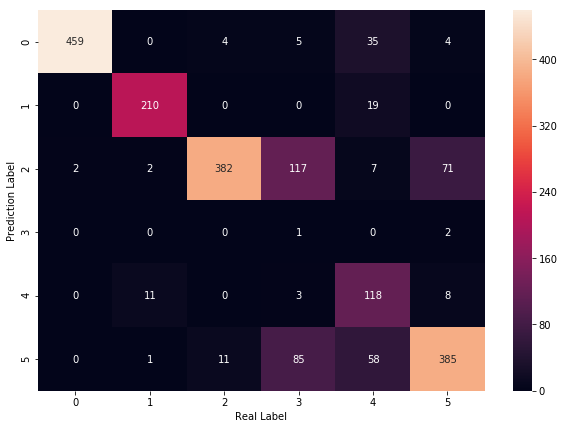

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [18]:

def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs


# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []


for j in range(4435):
    pred = []
    for i in range(31):
        [pred_outputs] = get_pred_train(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/4435
print("Test Accuracy:{}".format(train_acc))

winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))


# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
    print(item)

Test Accuracy:0.8076662908680947
Avg Train Accuracy:0.8519911263046878
Total nodes:534 Total connections::1259
0.8519911263046878
0.8076662908680947
0.7775
534
1259


In [80]:
winner_fitness1 = [0.9677564825253664,
 0.7237880496054115,
 0.9052987598647125,
 0.6863585118376551,
 0.876662908680947,
 0.7397970687711387,
 0.8178128523111612,
 0.7770011273957159,
 0.8342728297632469,
 0.8669673055242391,
 0.7799323562570463,
 0.8958286358511838,
 0.8444193912063134,
 0.9591882750845547,
 0.8045095828635851,
 0.9898534385569335,
 0.9488162344983089,
 0.801803833145434,
 0.9346110484780158,
 0.8214205186020294,
 0.864261555806088,
 0.7307779030439684,
 0.8626832018038332,
 0.9350620067643743,
 0.7977452085682074,
 0.8036076662908681,
 0.8200676437429538,
 0.9068771138669673,
 0.7887260428410372,
 0.9032694475760992,
 0.8450958286358512]

In [87]:
winner_fitness

[0.9632468996617812,
 0.7350620067643743,
 0.8962795941375423,
 0.7231116121758737,
 0.8773393461104848,
 0.7375422773393461,
 0.8322435174746335,
 0.771815107102593,
 0.825479143179256,
 0.8667418263810598,
 0.7596392333709132,
 0.894250281848929,
 0.8647125140924464,
 0.9560315670800451,
 0.8326944757609921,
 0.9860202931228861,
 0.9587373167981962,
 0.8103720405862458,
 0.9465614430665164,
 0.8913190529875986,
 0.864261555806088,
 0.6953776775648253,
 0.8631341600901916,
 0.9422773393461105,
 0.7887260428410372,
 0.8144306651634724,
 0.829086809470124,
 0.9068771138669673,
 0.8214205186020294,
 0.8980834272829763,
 0.8588500563697858]

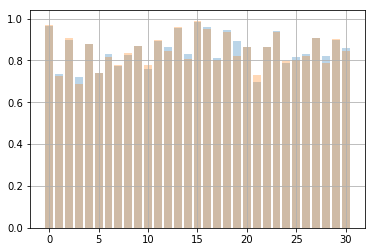

In [86]:
plt.bar(range(31),winner_fitness, alpha = 0.3)
plt.bar(range(31),winner_fitness1, alpha = 0.3)
plt.grid()
plt.show()

In [73]:
import random

necoc = 3

while True:
    number_codes = []
    for i in range(2**(6-1), 2**6-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**5 - 1,6).T     

    slice = random.sample(range(2**5-1), necoc)
    #slice = range(31)
    
    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(5):
        for j in range(i+1,6):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print("min row distanse: {}".format(min_error))
        #print(number_codes)
        break
print("We choose classifers: {}".format(slice))
print("classes are: {}".format(classes))
#np.array(number_codes)
print("accuracy of each classifier:{}".format([winner_fitness[i] for i in slice]))
rou = min_error/necoc
epsilon = np.mean([1 - winner_fitness[i] for i in slice])
print("p:{}, e:{}: training error:{}".format(rou, epsilon, 2*epsilon/rou))

min row distanse: 1
We choose classifers: [10, 17, 18]
classes are: [[0, 2, 4], [0, 1, 5], [0, 1, 4]]
accuracy of each classifier:[0.7596392333709132, 0.8103720405862458, 0.9465614430665164]
p:0.3333333333333333, e:0.16114242765877487: training error:0.9668545659526493


In [74]:
from itertools import combinations

def combine(temp_list, n):
    '''根据n获得列表中的所有可能组合（n个元素为一组）'''
    temp_list2 = []
    for c in combinations(temp_list, n):
        temp_list2.append(c)
    return temp_list2

list1 = range(31)
end_list = []

end_list.extend(combine(list1, 3))

In [91]:
te = []
cc = []

for code in end_list:
    number_codes = []
    for i in range(2**(6-1), 2**6-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**5 - 1,6).T     

    slice = code
    #slice = range(31)
    
    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(5):
        for j in range(i+1,6):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print("min row distanse: {}".format(min_error))
        print("We choose classifers: {}".format(slice))
        print("classes are: {}".format(classes))
        #np.array(number_codes)
        print("accuracy of each classifier:{}".format([winner_fitness[i] for i in slice]))
        rou = min_error/necoc
        epsilon = np.mean([1 - winner_fitness[i] for i in slice])
        print("p:{}, e:{}: training error:{}".format(rou, epsilon, 2*epsilon/rou))
        #print(number_codes)
        te.append(2*epsilon/rou)
        cc.append(classes)
        continue


min row distanse: 1
We choose classifers: (1, 6, 10)
classes are: [[0, 5], [0, 3, 4], [0, 2, 4]]
accuracy of each classifier:[0.7350620067643743, 0.8322435174746335, 0.7596392333709132]
p:0.3333333333333333, e:0.22435174746335965: training error:1.346110484780158
min row distanse: 1
We choose classifers: (1, 6, 11)
classes are: [[0, 5], [0, 3, 4], [0, 2, 4, 5]]
accuracy of each classifier:[0.7350620067643743, 0.8322435174746335, 0.894250281848929]
p:0.3333333333333333, e:0.17948139797068774: training error:1.0768883878241264
min row distanse: 1
We choose classifers: (1, 6, 12)
classes are: [[0, 5], [0, 3, 4], [0, 2, 3]]
accuracy of each classifier:[0.7350620067643743, 0.8322435174746335, 0.8647125140924464]
p:0.3333333333333333, e:0.18932732055618193: training error:1.1359639233370917
min row distanse: 1
We choose classifers: (1, 6, 13)
classes are: [[0, 5], [0, 3, 4], [0, 2, 3, 5]]
accuracy of each classifier:[0.7350620067643743, 0.8322435174746335, 0.9560315670800451]
p:0.33333333333

p:0.3333333333333333, e:0.1878241262683202: training error:1.1269447576099214
min row distanse: 1
We choose classifers: (5, 6, 10)
classes are: [[0, 3, 5], [0, 3, 4], [0, 2, 4]]
accuracy of each classifier:[0.7375422773393461, 0.8322435174746335, 0.7596392333709132]
p:0.3333333333333333, e:0.22352499060503572: training error:1.3411499436302143
min row distanse: 1
We choose classifers: (5, 6, 11)
classes are: [[0, 3, 5], [0, 3, 4], [0, 2, 4, 5]]
accuracy of each classifier:[0.7375422773393461, 0.8322435174746335, 0.894250281848929]
p:0.3333333333333333, e:0.17865464111236382: training error:1.071927846674183
min row distanse: 1
We choose classifers: (5, 6, 16)
classes are: [[0, 3, 5], [0, 3, 4], [0, 1]]
accuracy of each classifier:[0.7375422773393461, 0.8322435174746335, 0.9587373167981962]
p:0.3333333333333333, e:0.1571589627959414: training error:0.9429537767756485
min row distanse: 1
We choose classifers: (5, 6, 17)
classes are: [[0, 3, 5], [0, 3, 4], [0, 1, 5]]
accuracy of each clas

In [79]:
np.min(te)

0.5664036076662909

In [96]:
te.sort()
print(te)

[0.5664036076662909, 0.5767756482525366, 0.5889515219842165, 0.6196166854565952, 0.6268320180383316, 0.6354002254791433, 0.6408117249154456, 0.6489289740698985, 0.6674182638105974, 0.6755355129650507, 0.6868094701240136, 0.6886133032694478, 0.6895152198421646, 0.69086809470124, 0.6913190529875985, 0.6949267192784668, 0.6962795941375421, 0.6976324689966178, 0.7012401352874859, 0.7062006764374293, 0.7080045095828635, 0.708455467869222, 0.7093573844419391, 0.7125140924464486, 0.7129650507328071, 0.7129650507328075, 0.72423900789177, 0.7273957158962794, 0.7278466741826383, 0.730552423900789, 0.7314543404735061, 0.7386696730552422, 0.740924464487035, 0.740924464487035, 0.7445321307779029, 0.7485907553551296, 0.7494926719278466, 0.7517474633596393, 0.7526493799323561, 0.7553551296505073, 0.7558060879368659, 0.755806087936866, 0.7598647125140925, 0.7652762119503947, 0.7724915445321309, 0.7747463359639233, 0.7751972942502818, 0.7806087936865841, 0.7819616685456594, 0.7842164599774522, 0.786020

In [88]:
len(te)

420

In [90]:
len(end_list)

4495

In [93]:
len(cc)

420

- We choose classifers: (9, 16, 19)
- classes are: [[0, 2, 5], [0, 1], [0, 1, 4, 5]]
- accuracy of each classifier:[0.8667418263810598, 0.9587373167981962, 0.8913190529875986]
- p:0.3333333333333333, e:0.09440060127771514: training error:0.5664036076662909


- We choose classifers: (13, 19, 20)
- classes are: [[0, 2, 3, 5], [0, 1, 4, 5], [0, 1, 3]]
- accuracy of each classifier:[0.9560315670800451, 0.8913190529875986, 0.864261555806088]
- p:0.3333333333333333, e:0.0961292747087561: training error:0.5767756482525366


- We choose classifers: (11, 12, 18)
- classes are: [[0, 2, 4, 5], [0, 2, 3], [0, 1, 4]]
- accuracy of each classifier:[0.894250281848929, 0.8647125140924464, 0.9465614430665164]
- p:0.3333333333333333, e:0.09815858699736942: training error:0.5889515219842165


- We choose classifers: (8, 17, 20)
- classes are: [[0, 2], [0, 1, 5], [0, 1, 3]]
- accuracy of each classifier:[0.825479143179256, 0.8103720405862458, 0.864261555806088]
- p:0.3333333333333333, e:0.16662908680947008: training error:0.9997745208568205


- We choose classifers: (4, 10, 22)
- classes are: [[0, 3], [0, 2, 4], [0, 1, 3, 4]]
- accuracy of each classifier:[0.8773393461104848, 0.7596392333709132, 0.8631341600901916]
- p:0.3333333333333333, e:0.1666290868094701: training error:0.9997745208568207


- We choose classifers: (4, 14, 24)
- classes are: [[0, 3], [0, 2, 3, 4], [0, 1, 2]]
- accuracy of each classifier:[0.8773393461104848, 0.8326944757609921, 0.7887260428410372]
- p:0.3333333333333333, e:0.16708004509582863: training error:1.0024802705749718


- We choose classifers: (3, 21, 24)
- classes are: [[0, 4, 5], [0, 1, 3, 5], [0, 1, 2]]
- accuracy of each classifier:[0.7231116121758737, 0.6953776775648253, 0.7887260428410372]
- p:0.3333333333333333, e:0.26426155580608796: training error:1.5855693348365278


- We choose classifers: (1, 21, 24)
- classes are: [[0, 5], [0, 1, 3, 5], [0, 1, 2]]
- accuracy of each classifier:[0.7350620067643743, 0.6953776775648253, 0.7887260428410372]
- p:0.3333333333333333, e:0.26027809094325444: training error:1.5616685456595267


- We choose classifers: (3, 5, 10)
- classes are: [[0, 4, 5], [0, 3, 5], [0, 2, 4]]
- accuracy of each classifier:[0.7231116121758737, 0.7375422773393461, 0.7596392333709132]
- p:0.3333333333333333, e:0.259902292371289: training error:1.559413754227734

In [2]:
te = [0.5664036076662909, 0.5767756482525366, 0.5889515219842165, 0.6196166854565952, 0.6268320180383316, 0.6354002254791433, 0.6408117249154456, 0.6489289740698985, 0.6674182638105974, 0.6755355129650507, 0.6868094701240136, 0.6886133032694478, 0.6895152198421646, 0.69086809470124, 0.6913190529875985, 0.6949267192784668, 0.6962795941375421, 0.6976324689966178, 0.7012401352874859, 0.7062006764374293, 0.7080045095828635, 0.708455467869222, 0.7093573844419391, 0.7125140924464486, 0.7129650507328071, 0.7129650507328075, 0.72423900789177, 0.7273957158962794, 0.7278466741826383, 0.730552423900789, 0.7314543404735061, 0.7386696730552422, 0.740924464487035, 0.740924464487035, 0.7445321307779029, 0.7485907553551296, 0.7494926719278466, 0.7517474633596393, 0.7526493799323561, 0.7553551296505073, 0.7558060879368659, 0.755806087936866, 0.7598647125140925, 0.7652762119503947, 0.7724915445321309, 0.7747463359639233, 0.7751972942502818, 0.7806087936865841, 0.7819616685456594, 0.7842164599774522, 0.7860202931228861, 0.7905298759864712, 0.7914317925591883, 0.7959413754227734, 0.7981961668545658, 0.7995490417136415, 0.8, 0.8027057497181511, 0.8085682074408116, 0.8085682074408116, 0.8085682074408116, 0.8090191657271701, 0.8126268320180384, 0.8130777903043966, 0.8135287485907552, 0.8139797068771137, 0.8157835400225477, 0.8162344983089063, 0.8175873731679821, 0.818489289740699, 0.8193912063134161, 0.8198421645997745, 0.8207440811724913, 0.8216459977452087, 0.8234498308906426, 0.8243517474633597, 0.8248027057497183, 0.8270574971815107, 0.8297632468996616, 0.8297632468996616, 0.8329199549041713, 0.8338218714768884, 0.8338218714768884, 0.8347237880496053, 0.8351747463359639, 0.8369785794813981, 0.8401352874859074, 0.8410372040586245, 0.841488162344983, 0.8423900789177001, 0.8432919954904172, 0.8459977452085684, 0.8464487034949266, 0.8473506200676437, 0.8482525366403608, 0.8532130777903042, 0.8541149943630213, 0.8581736189402479, 0.858173618940248, 0.859075535512965, 0.8604284103720407, 0.8613303269447578, 0.8640360766629087, 0.8644870349492673, 0.8649379932356258, 0.8689966178128521, 0.8726042841037203, 0.8726042841037205, 0.8739571589627959, 0.8780157835400227, 0.8798196166854564, 0.8811724915445323, 0.8838782412626832, 0.8870349492671927, 0.8892897406989853, 0.8897406989853438, 0.8910935738444193, 0.896054114994363, 0.8965050732807214, 0.8983089064261556, 0.8987598647125141, 0.9005636978579482, 0.901465614430665, 0.9028184892897406, 0.9032694475760992, 0.9037204058624577, 0.9041713641488163, 0.9041713641488163, 0.9059751972942502, 0.9064261555806088, 0.9077790304396844, 0.9082299887260429, 0.9100338218714771, 0.9100338218714771, 0.9131905298759864, 0.9131905298759864, 0.9154453213077791, 0.9154453213077791, 0.9163472378804961, 0.9172491544532129, 0.9204058624577225, 0.9204058624577225, 0.9213077790304396, 0.9235625704622323, 0.9262683201803835, 0.9271702367531003, 0.9276211950394588, 0.9285231116121757, 0.9303269447576098, 0.932130777903044, 0.9343855693348364, 0.9343855693348364, 0.9343855693348364, 0.9343855693348364, 0.9352874859075533, 0.9397970687711387, 0.9416009019165729, 0.9425028184892896, 0.9429537767756485, 0.9438556933483653, 0.9438556933483653, 0.9447576099210822, 0.9479143179255919, 0.9479143179255919, 0.947914317925592, 0.948816234498309, 0.9497181510710261, 0.9533258173618941, 0.955129650507328, 0.9560315670800451, 0.9582863585118375, 0.9587373167981961, 0.9591882750845546, 0.96054114994363, 0.9614430665163471, 0.9623449830890641, 0.9623449830890642, 0.9645997745208569, 0.9645997745208569, 0.9645997745208569, 0.9664036076662911, 0.9668545659526493, 0.9668545659526496, 0.9673055242390082, 0.9682074408117247, 0.9695603156708004, 0.9695603156708006, 0.9718151071025931, 0.9722660653889517, 0.9745208568207443, 0.9754227733934614, 0.977226606538895, 0.9772266065388953, 0.9781285231116121, 0.9785794813979707, 0.9817361894024801, 0.9826381059751972, 0.9835400225479143, 0.9862457722660654, 0.9866967305524239, 0.9875986471251409, 0.9889515219842165, 0.9907553551296504, 0.9916572717023673, 0.9916572717023675, 0.9925591882750844, 0.9934611048478015, 0.9943630214205185, 0.9988726042841036, 0.9997745208568205, 0.9997745208568207, 1.0024802705749718, 1.0029312288613303, 1.0029312288613303, 1.0029312288613303, 1.0038331454340474, 1.0060879368658402, 1.0069898534385573, 1.0074408117249154, 1.007891770011274, 1.0092446448703494, 1.009695603156708, 1.0101465614430667, 1.0110484780157836, 1.0119503945885007, 1.0133032694475763, 1.0137542277339349, 1.0187147688838782, 1.0227733934611047, 1.0250281848928975, 1.026381059751973, 1.02728297632469, 1.0286358511837657, 1.0286358511837657, 1.0295377677564828, 1.031792559188275, 1.0403607666290868, 1.0417136414881623, 1.043066516347238, 1.0471251409244644, 1.0507328072153326, 1.0516347237880497, 1.0552423900789176, 1.0565952649379933, 1.0593010146561443, 1.0629086809470123, 1.064261555806088, 1.0647125140924463, 1.0656144306651634, 1.066967305524239, 1.0687711386696732, 1.0696730552423899, 1.0701240135287484, 1.0719278466741826, 1.0719278466741826, 1.071927846674183, 1.0723788049605412, 1.0728297632468997, 1.0768883878241264, 1.0768883878241264, 1.0777903043968435, 1.0800450958286356, 1.0809470124013527, 1.082750845546787, 1.0827508455467871, 1.0832018038331455, 1.0832018038331455, 1.0854565952649378, 1.0854565952649382, 1.0877113866967305, 1.0908680947012401, 1.0913190529875987, 1.0931228861330329, 1.0935738444193914, 1.0980834272829763, 1.0980834272829765, 1.0985343855693348, 1.0989853438556934, 1.099436302142052, 1.1062006764374295, 1.1071025930101466, 1.1116121758737316, 1.117023675310034, 1.1174746335963925, 1.120631341600902, 1.1210822998872603, 1.122435174746336, 1.123337091319053, 1.1255918827508458, 1.1260428410372043, 1.1264937993235624, 1.1269447576099214, 1.133709131905299, 1.133709131905299, 1.1359639233370917, 1.1368658399098084, 1.14543404735062, 1.146335963923337, 1.1485907553551298, 1.1485907553551298, 1.1549041713641488, 1.155806087936866, 1.1562570462232244, 1.1589627959413757, 1.1598647125140924, 1.1598647125140928, 1.1607666290868095, 1.161217587373168, 1.162119503945885, 1.1639233370913191, 1.1648252536640362, 1.1661781285231119, 1.1666290868094704, 1.1670800450958285, 1.167531003382187, 1.1697857948139798, 1.1697857948139798, 1.1715896279594138, 1.172491544532131, 1.173393461104848, 1.1747463359639232, 1.1747463359639236, 1.177001127395716, 1.1774520856820743, 1.177903043968433, 1.1783540022547914, 1.1824126268320179, 1.1855693348365277, 1.1927846674182636, 1.195490417136415, 1.196392333709132, 1.1986471251409248, 1.2036076662908681, 1.2045095828635852, 1.206764374295378, 1.2076662908680946, 1.2085682074408115, 1.2085682074408117, 1.2094701240135288, 1.2103720405862457, 1.2112739571589628, 1.213979706877114, 1.2171364148816233, 1.2175873731679818, 1.2180383314543406, 1.2189402480270575, 1.2211950394588502, 1.2216459977452088, 1.2229988726042844, 1.2229988726042844, 1.223900789177001, 1.2279594137542278, 1.230665163472379, 1.2311161217587372, 1.2374295377677567, 1.2383314543404738, 1.2387824126268323, 1.2396843291995494, 1.2428410372040586, 1.2432919954904171, 1.2446448703494928, 1.2450958286358513, 1.2455467869222099, 1.2459977452085684, 1.250056369785795, 1.2532130777903046, 1.2568207440811725, 1.2577226606538894, 1.2595264937993236, 1.2613303269447578, 1.268545659526494, 1.2698985343855695, 1.2721533258173618, 1.2739571589627958, 1.274859075535513, 1.2762119503945886, 1.2771138669673057, 1.2793686583990984, 1.2798196166854565, 1.2811724915445322, 1.282074408117249, 1.2820744081172493, 1.2825253664036076, 1.2865839909808345, 1.2942502818489288, 1.2983089064261555, 1.3023675310033824, 1.3050732807215333, 1.308229988726043, 1.3109357384441942, 1.3163472378804961, 1.326719278466742, 1.3411499436302143, 1.346110484780158, 1.3492671927846676, 1.3501691093573847, 1.3524239007891774, 1.3555806087936866, 1.3627959413754227, 1.366403607666291, 1.3673055242390082, 1.3767756482525366, 1.3817361894024804, 1.4056369785794816, 1.4083427282976324, 1.409695603156708, 1.4133032694475762, 1.4137542277339348, 1.4277339346110485, 1.4331454340473506, 1.4335963923337092, 1.4570462232243517, 1.466967305524239, 1.4746335963923338, 1.4976324689966178, 1.498534385569335, 1.5048478015783542, 1.559413754227734, 1.5616685456595267, 1.5855693348365278]

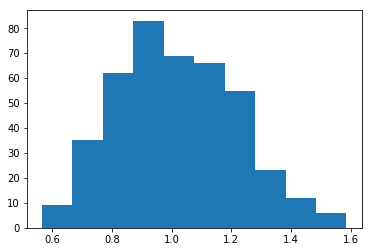

In [5]:
plt.hist(te)
plt.show()

In [5]:
import numpy as np
np.array(te)/3

array([0.1888012 , 0.19225855, 0.19631717, 0.2065389 , 0.20894401,
       0.21180008, 0.21360391, 0.21630966, 0.22247275, 0.2251785 ,
       0.22893649, 0.22953777, 0.22983841, 0.23028936, 0.23043968,
       0.23164224, 0.2320932 , 0.23254416, 0.23374671, 0.23540023,
       0.2360015 , 0.23615182, 0.23645246, 0.2375047 , 0.23765502,
       0.23765502, 0.241413  , 0.24246524, 0.24261556, 0.24351747,
       0.24381811, 0.24622322, 0.24697482, 0.24697482, 0.24817738,
       0.24953025, 0.24983089, 0.25058249, 0.25088313, 0.25178504,
       0.25193536, 0.25193536, 0.25328824, 0.25509207, 0.25749718,
       0.25824878, 0.2583991 , 0.26020293, 0.26065389, 0.26140549,
       0.26200676, 0.26350996, 0.2638106 , 0.26531379, 0.26606539,
       0.26651635, 0.26666667, 0.26756858, 0.26952274, 0.26952274,
       0.26952274, 0.26967306, 0.27087561, 0.27102593, 0.27117625,
       0.27132657, 0.27192785, 0.27207817, 0.27252912, 0.27282976,
       0.2731304 , 0.27328072, 0.27358136, 0.273882  , 0.27448